# Part 1 : Summary Stats

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import numpy as np
np.set_printoptions(precision=3, suppress=True)
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
movies=pd.read_csv("disney_movies.csv")

In [3]:
#Overall
movies.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [4]:
movies.shape

(579, 6)

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


In [6]:
movies.isnull().sum()

movie_title                  0
release_date                 0
genre                       17
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [7]:
movies['genre'] = movies.genre.fillna('NoData')
movies['mpaa_rating'] = movies.mpaa_rating.fillna('NoData')

In [8]:
movies.isnull().sum()

movie_title                 0
release_date                0
genre                       0
mpaa_rating                 0
total_gross                 0
inflation_adjusted_gross    0
dtype: int64

In [9]:
#Statistical summary of numeric variables
movies.describe()

,total_gross,inflation_adjusted_gross
count,579.00,579.00
mean,64701788.52,118762523.31
std,93013006.12,286085280.04
min,0.00,0.00
25%,12788864.00,22741232.00
50%,30702446.00,55159783.00
75%,75709033.00,119202000.00
max,936662225.00,5228953251.00


In [10]:
# Genre Analysis
movies.genre.value_counts()

Comedy                 182
Adventure              129
Drama                  114
Action                  40
Thriller/Suspense       24
Romantic Comedy         23
NoData                  17
Musical                 16
Documentary             16
Western                  7
Horror                   6
Black Comedy             3
Concert/Performance      2
Name: genre, dtype: int64

In [11]:
movies.genre.value_counts(normalize=True)

Comedy                0.31
Adventure             0.22
Drama                 0.20
Action                0.07
Thriller/Suspense     0.04
Romantic Comedy       0.04
NoData                0.03
Musical               0.03
Documentary           0.03
Western               0.01
Horror                0.01
Black Comedy          0.01
Concert/Performance   0.00
Name: genre, dtype: float64

In [12]:
Genre_gromovies=movies.groupby('genre').inflation_adjusted_gross.describe()
Genre_gromovies.sort_values(by=['mean'], ascending=False)

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Musical,16.00,603597861.00,1346573258.55,11468231.00,77724163.75,103167587.50,282125541.00,5228953251.00
Adventure,129.00,190397412.08,254601568.70,2984.00,48114115.00,102254492.00,256263359.00,2188229052.00
Action,40.00,137473419.65,145310137.45,0.00,44252996.25,69012064.50,188902500.00,660081224.00
Thriller/Suspense,24.00,89653789.75,112118847.87,3957025.00,25847183.00,51804588.00,109207808.75,485424724.00
Comedy,182.00,84667730.29,122647640.01,82277.00,25297336.00,51195217.00,109434521.50,1362870985.00
Romantic Comedy,23.00,77777084.04,79855297.77,907414.00,29928224.00,57925202.00,98672753.50,356389765.00
Western,7.00,73815706.57,36379387.40,15983331.00,55982015.50,89042541.00,91969154.50,115781734.00
Drama,114.00,71893021.79,146109217.29,0.00,13780046.75,39325794.00,87106850.75,1236035515.00
Concert/Performance,2.00,57410839.00,27204029.87,38174685.00,47792762.00,57410839.00,67028916.00,76646993.00


In [13]:
movies.groupby('genre')['inflation_adjusted_gross'].sum().sort_values(ascending=False)

genre
Adventure              24561266158
Comedy                 15409526913
Musical                 9657565776
Drama                   8195804484
Action                  5498936786
Thriller/Suspense       2151690954
Romantic Comedy         1788872933
Western                  516709946
NoData                   367603384
Documentary              203488418
Black Comedy             156730475
Horror                   140483092
Concert/Performance      114821678
Name: inflation_adjusted_gross, dtype: int64

In [14]:
# mpaa_rating Analysis
Rate_gromovies=movies.groupby('mpaa_rating').inflation_adjusted_gross.describe()
Rate_gromovies.sort_values(by=['mean'], ascending=False)

,count,mean,std,min,25%,50%,75%,max
mpaa_rating,,,,,,,,
Not Rated,3.00,299873412.67,427623540.58,426246.00,55003946.00,109581646.00,449596996.00,789612346.00
G,86.00,291260995.01,669540405.58,7895708.00,34877411.25,103154765.50,257837048.25,5228953251.00
PG-13,145.00,102948584.00,142575910.69,51988.00,24333094.00,51373912.00,97356578.00,936662225.00
PG,187.00,101541433.59,95412972.40,2984.00,33929468.50,69055550.00,137319831.50,486295561.00
NoData,56.00,58186611.79,84928141.03,0.00,11887242.25,32106907.00,71215858.50,528279994.00
R,102.00,55305805.55,67035130.75,65543.00,11389444.00,31587673.50,67109124.75,356389765.00


In [15]:
movies.groupby('mpaa_rating')['inflation_adjusted_gross'].sum().sort_values(ascending=False)

mpaa_rating
G            25048445571
PG           18988248082
PG-13        14927544680
R             5641192166
NoData        3258450260
Not Rated      899620238
Name: inflation_adjusted_gross, dtype: int64

In [16]:
movies2=movies.sort_values(by=['inflation_adjusted_gross'], ascending=False)
movies2.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515


In [17]:
movies3=movies
movies3['release_date'] = pd.to_datetime(movies['release_date'],format='%Y-%m-%d')
movies3['release_year']=[i.year for i in movies3["release_date"]]
movies3.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,release_year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950


In [18]:
movies3.groupby('release_year')['inflation_adjusted_gross'].sum().sort_values(ascending=False).head()


release_year
1937    5228953251
1940    4375319860
2016    2873393105
2015    2495662696
1998    2189031209
Name: inflation_adjusted_gross, dtype: int64

In [19]:
movies3.groupby('release_year')['movie_title'].count().sort_values(ascending=False).head()

release_year
1995    32
1994    30
1996    28
1993    27
1997    23
Name: movie_title, dtype: int64

In [20]:
Year_gromovies=movies3.groupby('release_year').inflation_adjusted_gross.describe()
Year_gromovies.sort_values(by=['mean'], ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
release_year,,,,,,,,
1937,1.00,5228953251.00,nan,5228953251.00,5228953251.00,5228953251.00,5228953251.00,5228953251.00
1940,2.00,2187659930.00,804860.05,2187090808.00,2187375369.00,2187659930.00,2187944491.00,2188229052.00
1955,1.00,1236035515.00,nan,1236035515.00,1236035515.00,1236035515.00,1236035515.00,1236035515.00
1946,1.00,1078510579.00,nan,1078510579.00,1078510579.00,1078510579.00,1078510579.00,1078510579.00
1950,1.00,920608730.00,nan,920608730.00,920608730.00,920608730.00,920608730.00,920608730.00
1967,1.00,789612346.00,nan,789612346.00,789612346.00,789612346.00,789612346.00,789612346.00
1961,3.00,599268906.33,667754301.94,124841160.00,217467867.00,310094574.00,836482779.50,1362870985.00
1954,1.00,528279994.00,nan,528279994.00,528279994.00,528279994.00,528279994.00,528279994.00
2015,11.00,226878426.91,274467338.09,12429583.00,58397014.50,123087120.00,278806532.00,936662225.00


In [21]:
pvtable1=pd.pivot_table(movies,index=['genre','mpaa_rating'])
pvtable1[['inflation_adjusted_gross','total_gross']].sort_values(by=['inflation_adjusted_gross'], ascending=False)

inflation_adjusted_gross  total_gross
genre               mpaa_rating                                       
Musical             G                        934604859.11  82083109.44
                    Not Rated                789612346.00 141843000.00
Drama               G                        473178139.00  67994825.40
Adventure           PG-13                    267694568.71 233934567.18
                    G                        241333442.02 113183079.19
Comedy              G                        217420275.24 100845217.59
Romantic Comedy     R                        190664441.50  95430518.00
Action              PG-13                    185075490.58 166405170.21
Adventure           PG                       151329080.67 128949508.04
Thriller/Suspense   PG-13                    135120911.23  91583867.54
Romantic Comedy     G                        129164207.00  95149435.00
Action              R                        117253727.17  62405121.67
Adventure           NoData                   109683693.40  21060648.80
Comedy              Not Rated                109581646.00   9230769.00
Western             R                         98664703.00  57418159.50
Musical             NoData                    91305448.00  17871174.00
Comedy              PG                        89057867.40  52303658.82
Musical             PG                        88434004.75  63297477.50
Action              PG                        85233162.00  42385924.00
Drama               PG                        76714510.86  54437916.18
Western             PG-13                     75849302.25  58981878.25
Romantic Comedy     PG                        74229973.71  50901696.00
                    NoData                    68181300.00  31623833.00
Comedy              NoData                    63260172.85  16464330.00
Romantic Comedy     PG-13                     57549060.58  39855056.58
Concert/Performance G                         57410839.00  51728233.00
Drama               PG-13                     56539245.11  38697594.16
Comedy              PG-13                     52646467.84  33870387.95
Black Comedy        R                         52243491.67  32514404.00
Comedy              R                         51107401.03  26204917.57
Adventure           R                         50619797.67  32588013.00
NoData              NoData                    45471870.43  13391700.14
Drama               R                         41267462.73  21749278.76
Thriller/Suspense   R                         37943040.22  19548911.67
Action              NoData                    37322982.25  15518492.00
Horror              PG-13                     29712825.00  23086480.00
Thriller/Suspense   PG                        27569558.00  27569558.00
                    NoData                    26062188.00  12706478.00
Horror              R                         23908375.50  14581576.25
Drama               NoData                    20739013.27   8472727.91
Documentary         G                         19497601.50  17440665.50
Western             PG                        15983331.00   8247627.00
Horror              NoData                    15136765.00   5656087.00
Musical             PG-13                     11468231.00   5632086.00
NoData              PG-13                      7173118.50   3527334.50
                    R                          3682529.50   1815073.50
                    PG                         2938849.50   1467740.00
Documentary         PG                         1617231.40   1192992.80
                    Not Rated                   426246.00    314000.00

**Summary statistics are divided into four parts.**

First, from the overall point of view of the data set, the data set includes movie_title, release_date, genre, mpaa_rating, total_gross, inflation_adjusted_gross six variables, a total of 579 rows. The last two variables are numeric. We replace the missing values in genre and mpaa_rating with the corresponding 'no data' string, representing the missing data in the original data. From the numerical data, the average gross of Disney movies from 1937 to 2016 is  64701788.52USD and the average inflation-adjusted gross is 118762523.31USD. Both show a right-tilted distribution. Due to the extensive period of the movie, we think that it is not meaningful to compare gross directly, so inflation-adjusted gross is used in the later analysis.

Second, according to genre's analysis, there were a total of 12 types in 79 years.Comedy had the largest number of movies, 182, accounting for 31% , and Adventure followed by 129, accounting for 22%. These two account for half of the Disney movies. The most minor Concert/Performance is 2. On the other hand, from the adjusted gross point of view, Adventure has the highest total value, Comedy second, and Musical third. The mean value of Musical is the highest at 603597861.00USD, followed by Adventure. And Comedy, which has the largest number of movies, ranked fifth, with an average of 84667730.29USD


Third, from the perspective of mpaa_rating, excluding the three unrated movies, G-rated movies have the highest adjusted gross average value, and R-rated movies have the lowest adjusted_gross average value. However, there are many PG and PG-13 movies, the total gross is high, but the average performance is normal. Besides, we can also explore the five most popular movies. The G-rated Musical movie Snow White and the Seven Dwarfs, released in 1937, won the crown with gross more than twice as much as the second place. It is not difficult to find that the top five are all old movies, and they are all G-rated movies. 

Fourth, from the year analysis, the adjusted gross sum of 1937 was the highest, and the adjusted gross sum of 1998 was the lowest.Interestingly, the number of movies released in 1995 was the most, but the total adjusted gross of 1995 did not even rank in the top five. In 1937, only one film was released, and it was the number one film, which shows the popularity of this film. Finally, judging from the genre of different movies, G-rated movies still perform well.


To sum up, Disney has made good profits in Adventure, Comedy, and G-rated movies gross, but in recent years, movie revenues have shown a downward trend, and there have been no phenomenon-level hot movies for years. From the perspective of Disney management. We believe that improvements and enhancements can be made from three aspects. Disney should continue to maintain the film development in its dominant area and maintain Adventure, Comedy, and G-rated movie dividends. Also, Musical was very popular in the early years, and Disney can try to restart this type. Second, Disney can extract value from old movies because the adjusted gross of old movies is very high, indicating that the audience likes these IPs. Disney can try new movies to refilm or re-screening movies to reap profits.
Moreover, high-profit movies represent high-value IPs, and Disney can also try to increase the proportion of these IPs in the park, attracting tourists with a nostalgic theme. In the end, Disney should win by the quality and not just by quantity. The data shows that blindly increasing the number of movies does not bring higher benefits. Disney can try to reproduce the successful elements in the hit movies and create the next classic.


# Part 2: Segmentation and Targeting

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
family = pd.read_csv("family_segments.csv")

In [23]:
family.head()

,hhold_ID,est_net_worth,est_inc,domestic,number_visits,number_children,oldest_child_age,dis_plus_sub,online_merch_avg,est_annual_travel,est_annual_leisure,est_hhold_FICO
0,1,7525,7825,1,0,2,9.00,0,826.00,2309.00,4094.00,701
1,2,639815,449775,1,1,2,11.00,0,1779.00,9060.00,8670.00,764
2,3,288847,204750,1,6,3,13.00,1,2121.00,6436.00,5021.00,720
3,4,191791,136730,1,1,1,8.00,1,1880.00,13107.00,66074.00,783
4,5,96527,72165,0,3,0,nan,0,775.00,2042.00,2846.00,757


In [24]:
family.columns

Index(['hhold_ID', 'est_net_worth', 'est_inc', 'domestic', 'number_visits',
       'number_children', 'oldest_child_age', 'dis_plus_sub',
       'online_merch_avg', 'est_annual_travel', 'est_annual_leisure',
       'est_hhold_FICO'],
      dtype='object')

In [25]:
family.describe()

,hhold_ID,est_net_worth,est_inc,domestic,number_visits,number_children,oldest_child_age,dis_plus_sub,online_merch_avg,est_annual_travel,est_annual_leisure,est_hhold_FICO
count,9250.00,9250.00,9250.00,9250.00,9250.00,9250.00,8724.00,9250.00,9250.00,9250.00,9250.00,9250.00
mean,4625.50,673905.57,475877.39,0.72,2.67,2.22,11.98,0.65,1324.08,8233.20,8933.81,750.28
std,2670.39,1335709.32,876427.87,0.45,3.30,1.12,2.02,0.48,537.16,10296.73,13101.42,25.33
min,1.00,51.00,370.00,0.00,0.00,0.00,5.00,0.00,669.00,0.00,2.00,655.00
25%,2313.25,42649.50,33270.00,0.00,1.00,1.00,11.00,0.00,786.00,1757.00,1891.00,733.00
50%,4625.50,166652.00,122465.00,1.00,2.00,2.00,12.00,1.00,1378.50,3880.00,3632.00,750.00
75%,6937.75,648823.00,455330.00,1.00,3.00,3.00,13.00,1.00,1804.00,9948.75,9203.75,768.00
max,9250.00,9883250.00,5497405.00,1.00,47.00,7.00,18.00,1.00,2759.00,49885.00,74805.00,847.00


In [26]:
family2 = family.iloc[:,1:]

In [27]:
del family2['domestic']

In [28]:
del family2['dis_plus_sub']

In [29]:
family2.isnull().sum()

est_net_worth           0
est_inc                 0
number_visits           0
number_children         0
oldest_child_age      526
online_merch_avg        0
est_annual_travel       0
est_annual_leisure      0
est_hhold_FICO          0
dtype: int64

In [30]:
# replace 0 with missing value given the conidtion that number_childeren is equal to 0.
family2.loc[(family2['number_children']==0),'oldest_child_age']=0
family2['number_children'].isnull().sum()

0

In [31]:
family2.describe()

,est_net_worth,est_inc,number_visits,number_children,oldest_child_age,online_merch_avg,est_annual_travel,est_annual_leisure,est_hhold_FICO
count,9250.00,9250.00,9250.00,9250.00,9250.00,9250.00,9250.00,9250.00,9250.00
mean,673905.57,475877.39,2.67,2.22,11.30,1324.08,8233.20,8933.81,750.28
std,1335709.32,876427.87,3.30,1.12,3.40,537.16,10296.73,13101.42,25.33
min,51.00,370.00,0.00,0.00,0.00,669.00,0.00,2.00,655.00
25%,42649.50,33270.00,1.00,1.00,10.00,786.00,1757.00,1891.00,733.00
50%,166652.00,122465.00,2.00,2.00,12.00,1378.50,3880.00,3632.00,750.00
75%,648823.00,455330.00,3.00,3.00,13.00,1804.00,9948.75,9203.75,768.00
max,9883250.00,5497405.00,47.00,7.00,18.00,2759.00,49885.00,74805.00,847.00


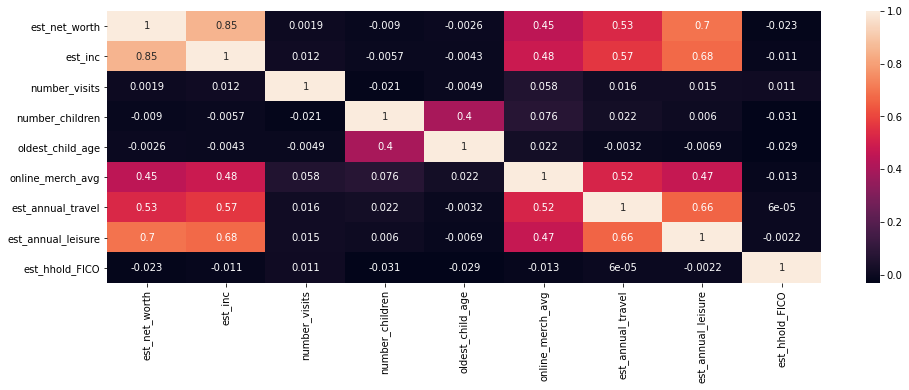

In [32]:
plt.figure(figsize = (16,5))
sns.heatmap(family2.corr(), annot=True);

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(family2)
family2_normalized = scaler.transform(family2)
family2_normalized = pd.DataFrame(data = family2_normalized,index=family2.index,columns=family2.columns)
print(family2_normalized.describe().round(3))

       est_net_worth  est_inc  number_visits  number_children  \
count        9250.00  9250.00        9250.00          9250.00   
mean            0.00    -0.00           0.00            -0.00   
std             1.00     1.00           1.00             1.00   
min            -0.51    -0.54          -0.81            -1.98   
25%            -0.47    -0.51          -0.51            -1.09   
50%            -0.38    -0.40          -0.20            -0.20   
75%            -0.02    -0.02           0.10             0.69   
max             6.89     5.73          13.45             4.25   

       oldest_child_age  online_merch_avg  est_annual_travel  \
count           9250.00           9250.00            9250.00   
mean              -0.00             -0.00               0.00   
std                1.00              1.00               1.00   
min               -3.33             -1.22              -0.80   
25%               -0.38             -1.00              -0.63   
50%                0.21       

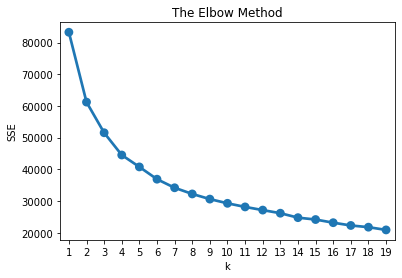

In [34]:
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=580)
    kmeans.fit(family2_normalized)
    sse[k] = kmeans.inertia_
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()),y=list(sse.values()));

In [35]:
kmeansmodel = KMeans(n_clusters = 5,random_state = 654)
kmeansmodel.fit(family2_normalized)
cluster_labels = kmeansmodel.labels_
family2_normalized.columns

Index(['est_net_worth', 'est_inc', 'number_visits', 'number_children',
       'oldest_child_age', 'online_merch_avg', 'est_annual_travel',
       'est_annual_leisure', 'est_hhold_FICO'],
      dtype='object')

## Selecting the optimal number of clusters

According to the elbow method, we locked the number of clusters between 4-6. Then we tried to use 4, 5 and 6 to perform cluster analysis respectively. According to the results of the three cluster analysis, we found that the result of the cluster of 5 is the clearest. Each cluster has very obvious characteristics. When using 4 clusters, some features are not displayed. Some features are further subdivided when using cluster 6. In general, 5 clusters are the best choice for this data set.

In [36]:
kmeans =family2.assign(Cluster = cluster_labels)
kmeans.groupby(['Cluster']).agg({
 'est_net_worth':'mean',
    'est_inc':'mean',
    'number_visits':'mean',
    'number_children':'mean',
       'oldest_child_age':'mean',
    'online_merch_avg':'mean',
    'est_annual_travel':'mean',
    'est_annual_leisure':'mean',
    'est_hhold_FICO':['mean', 'count'],
}).round(2)

est_net_worth    est_inc number_visits number_children  \
                 mean       mean          mean            mean   
Cluster                                                          
0           396021.57  296391.44          2.73            0.00   
1          4191588.15 2644538.10          2.58            2.24   
2           676279.98  540752.75          2.13            2.37   
3            55727.85   42026.21          2.11            2.36   
4           362980.25  289829.34         13.92            2.21   

        oldest_child_age online_merch_avg est_annual_travel  \
                    mean             mean              mean   
Cluster                                                       
0                   0.01          1235.83           6495.60   
1                  11.44          1848.99          28414.19   
2                  11.98          1837.72          10588.65   
3                  11.97           803.03           2731.42   
4                  11.92          1319.02           6535.29   

        est_annual_leisure est_hhold_FICO        
                      mean           mean count  
Cluster                                          
0                  6717.88         753.74   484  
1                 40811.82         749.42   795  
2                  9794.63         749.62  3465  
3                  2578.44         750.46  4131  
4                  6269.13         751.65   375

In [37]:
kmeans.groupby(['Cluster']).agg({
    'est_hhold_FICO':['count'],
}).round(2)/9250

,est_hhold_FICO
,count
Cluster,
0,0.05
1,0.09
2,0.37
3,0.45
4,0.04


In [38]:
kmeans['Cluster'] = kmeans['Cluster'].astype('category')

In [39]:
Clusters = ['Childfree', 'Monopoly', 'Mid class', 
        '996ers', 'Intense fans']
data = [484, 795, 3465, 4131, 375]
colors = ( "orange", "cyan", "brown",
          "grey", "indigo")
explode = (0.0, 0.0, 0.05, 0.05, 0.0)
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)


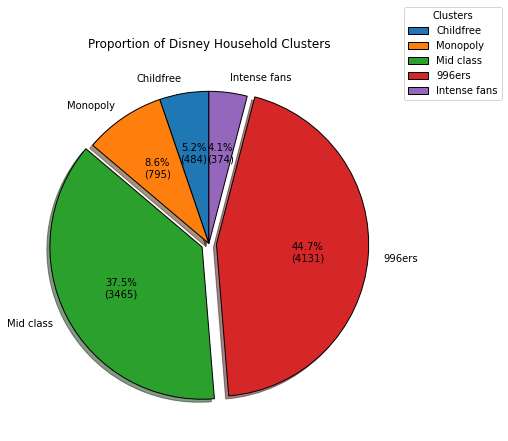

In [40]:
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data, 
                                  autopct = lambda pct: func(pct, data), 
                                  labels = Clusters,
                                  shadow = True,
                                  explode = explode,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
ax.set_title("Proportion of Disney Household Clusters")
ax.legend(wedges, Clusters,
          title ="Clusters",
          loc ="center left",
          bbox_to_anchor =(1, 0.5, 0.5, 1))


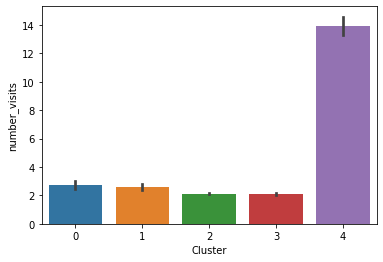

In [41]:
sns.barplot(x='Cluster', y='number_visits', data=kmeans);

<AxesSubplot:xlabel='est_net_worth', ylabel='online_merch_avg'>

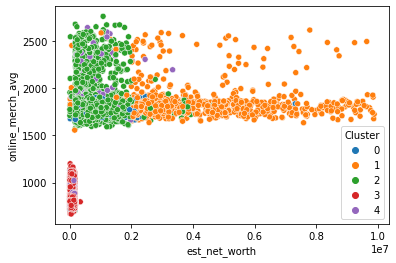

In [42]:
sns.scatterplot(x="est_net_worth",y="online_merch_avg",hue="Cluster",data=kmeans)

<AxesSubplot:xlabel='est_inc', ylabel='est_annual_travel'>

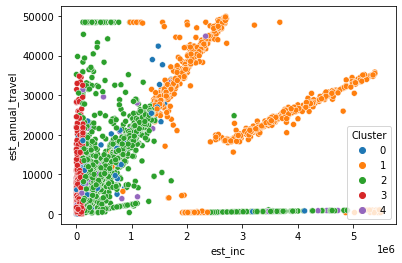

In [43]:
sns.scatterplot(x="est_inc",y="est_annual_travel",hue="Cluster",data=kmeans)

In [44]:
more_data = kmeans.groupby('Cluster')[['number_children', 'oldest_child_age']].mean()

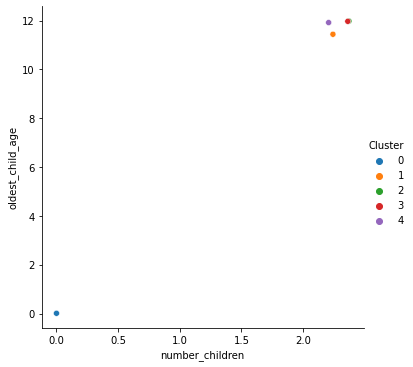

In [45]:
sns.relplot(x='number_children', y='oldest_child_age', hue='Cluster', data=more_data)

## Label each cluster

### Cluster 0: Childfree
An obvious feature of households in this cluster is that they have no children.We call this group: "Childfree". For this type of group, we can launch special events for couples to attract this part of the group. We can randomly hold virtual events which targeted to young couples or singles. Once they participate the event online, they will have chance to get special-customize gifts.

### Cluster 1: Monopoly
The household in this cluster has the highest net worth and annual income. And average annual spending at Disney online merchandise store is at the highest level.We call this group: "Monopoly". For these high-net-worth individuals, we think they need more customized services. They are more concerned about the quality of traveling experience, such as VIP rooms, fast lanes, and even private tour guides.
### Cluster 2: Mid class
This part of the household accounts for a large proportion of our total (about 37.5 percent), and we think we need to pay more attention to this part of the household. Because they have high family net worth and income, and average annual spending at Disney online merchandise store is also at the highest level. It can be said that this part of the population is the main consumer of online merchandise store. For people with high demand of online merchandise store puraches, we can consider enriching our online merchandise store products, and take the form of free shipping after reaching a certain amount of consumption to retain or even expand the number of these households.
### Cluster 3: 996ers
This part of household also accounts for a large proportion of our total (about 44.7%), and we think we need to pay more attention to this part of the population. This part of the population has low family net worth and low annual income. And average annual spending at Disney online merchandise store is also at the lowest level. For such groups, we choose to provide some preferential policies (for example, preferential activities or coupons) to attract them. This cluster is our largest customer group. In addition to our hope that they will help us increase our turnover, we also hope that they can produce a certain advertising effect. Recommend our services or products to others after experiencing our services. So we can't neglect this part of the group.
### Cluster 4: Intense fans
The last part of the household is our loyal fan. They come to our Park 14 times a year on average. They have a medium average annual spending at Disney online merchandise store level. We can establish online account for fans with ranks and the account can level up once they purchase or participate with the Park. Plus, we should hold some special exclusive events for fans, and the entry qualifications are related to fans ranking. Therefore, it will promote the fans' stickiness level and improve brand regconization.


# Part3: Conjoint Analysis

In [3]:
import pandas as pd

In [4]:
hotel = pd.read_csv("hotel_amenities.csv")

In [5]:
hotel.head(10)

,WiFi_Network,breakfast,parking,gym,flex_check,shuttle_bus,air_pure,jacuzzi,VIP_shop,pool_temp,avg_rating
0,Basic,None,Valet,None,No,No,No,No,No,76,4.57
1,Basic,None,Valet,None,No,No,No,No,No,80,7.60
2,Basic,None,Valet,None,No,No,No,No,No,84,5.66
3,Basic,None,Valet,None,No,No,No,No,Yes,76,2.80
4,Basic,None,Valet,None,No,No,No,No,Yes,80,4.56
5,Basic,None,Valet,None,No,No,No,No,Yes,84,5.12
6,Basic,None,Valet,None,No,No,No,Yes,No,76,2.44
7,Basic,None,Valet,None,No,No,No,Yes,No,80,2.66
8,Basic,None,Valet,None,No,No,No,Yes,No,84,4.22
9,Basic,None,Valet,None,No,No,No,Yes,Yes,76,7.39


In [6]:
hotel.isnull().values.any()

False

In [7]:
hotel.columns

Index(['WiFi_Network', 'breakfast', 'parking', 'gym', 'flex_check',
       'shuttle_bus', 'air_pure', 'jacuzzi', 'VIP_shop', 'pool_temp',
       'avg_rating'],
      dtype='object')

In [8]:
hotel2 = pd.get_dummies(hotel, drop_first=True, 
         columns=['WiFi_Network','breakfast','parking','gym',
                  'flex_check','shuttle_bus','air_pure', 
                  'jacuzzi','VIP_shop', 'pool_temp'])

In [9]:
hotel2.head(10)

,avg_rating,WiFi_Network_Best in Class,WiFi_Network_Strong,breakfast_Full Buffet,breakfast_None,parking_Valet,gym_Basic,gym_None,gym_Super,flex_check_Yes,shuttle_bus_Yes,air_pure_Yes,jacuzzi_Yes,VIP_shop_Yes,pool_temp_80,pool_temp_84
0,4.57,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
1,7.60,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0
2,5.66,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1
3,2.80,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0
4,4.56,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0
5,5.12,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1
6,2.44,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0
7,2.66,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0
8,4.22,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1
9,7.39,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0


In [10]:
hotel2.columns

Index(['avg_rating', 'WiFi_Network_Best in Class', 'WiFi_Network_Strong',
       'breakfast_Full Buffet', 'breakfast_None', 'parking_Valet', 'gym_Basic',
       'gym_None', 'gym_Super', 'flex_check_Yes', 'shuttle_bus_Yes',
       'air_pure_Yes', 'jacuzzi_Yes', 'VIP_shop_Yes', 'pool_temp_80',
       'pool_temp_84'],
      dtype='object')

In [11]:
X = hotel2[['WiFi_Network_Best in Class', 'WiFi_Network_Strong',
            'breakfast_Full Buffet', 'breakfast_None', 
            'parking_Valet', 
            'gym_Basic','gym_None', 'gym_Super', 
            'flex_check_Yes', 'shuttle_bus_Yes',
            'air_pure_Yes', 'jacuzzi_Yes', 'VIP_shop_Yes', 
            'pool_temp_80','pool_temp_84']]
y = hotel2['avg_rating']

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [13]:
regressor.intercept_

5.527955729166667

In [14]:
coef_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coef_df

,Coefficient
WiFi_Network_Best in Class,1.726814
WiFi_Network_Strong,1.187700
breakfast_Full Buffet,0.500998
breakfast_None,-0.225924
parking_Valet,0.093678
gym_Basic,-0.146314
gym_None,-0.168484
gym_Super,0.044363
flex_check_Yes,0.478220
shuttle_bus_Yes,0.419939


**The coefficients of this model show people's preference for each features in the hotels.**

* For Wi-Fi network, the preference is Best-In-Class > Strong > Basic, which shows that guests prefer a high-quality wifi network because few people can leave electronic devices and the Internet for work, contact and entertainment in this era.   


* For different breakfast types, the preference is Full buffett > Continental > None. It seems that guests prefer to take breakfast in a hotel and have a variety of breakfast options.   


* Guests prefer Valet parking more than Open lot parking, but the value of this coefficient is slight and the difference between the zero is small.  


* For Gym type, the preference is Super > Advanced > Basic > None. Base and None have negative coefficient, so the hotel at least offer Advanced Gym, otherwise it will have a negative impact on the rating. It seems that guests pay great attention to their health and have certain requirements for gym features and types of equipment.  


* Guests are more likely hotel has flexible check-in/check-out. Checkin/Checkout service is the most basic service in the hotel, if this service can be flexible, guests can schedule time more flexible.  


* For shuttle bus, guests more likely the hotel offer the service from downtown tourist and shopping destinations, because it will more convenient and efficient for guests to move the destinations.  


* Guests prefer room equipped with a state-of-the-art air purifier than no.  


* Guests prefer room equipped with a state-of-the-art jacuzzi/hot tub than no.  


* Guests are more likely to have VIP Shopping than no, which seems that they like to partake in high-end luxury shopping.


* For Outdoor Pool Temperatur, the preference is 84°F  > 80°F > 76 °F.Guests may feel that higher pool temperature will make the body more comfortable.

According to the coefficients, we can know the customer's favorite hotel features and the customer's favorite hotel bundle.  
  - Customer's favorite bundle:
- Wi-Fi network: Best-In-Class    
- breakfast type: Full buffett
- parking: Valet parking 
- Gym type: Super 
- Flexible check-in/check-out: Yes 
- shuttle bus: Yes   
- air pure: Yes 
- jacuzzi: Yes 
- VIP Shopping: Yes  
- Outdoor Pool Temp: 84 Fahrenheit

In [15]:
amenity = pd.read_csv("amenity_costs.csv")
amenity

,Amenity,Level,"Estimated Incremental Cost,\nPer Visitor/Per Night"
0,WiFi_Network,Basic,11.75
1,WiFi_Network,Strong,16.25
2,WiFi_Network,Best in Class,19.15
3,breakfast,None,0.00
4,breakfast,Continental,13.25
5,breakfast,Full Buffet,22.45
6,parking,Valet,60.00
7,parking,Open Lot,15.00
8,gym,None,0.00
9,gym,Basic,10.00


In [16]:
cost_cusfavor=19.15 + 22.45 + 60.00 + 65.00 + 12.00 + 75.00 + 12.85 + 40.00 + 12.00 + 45.00
cost_cusfavor

363.45

In [17]:
Favorite = hotel[(hotel['WiFi_Network']== 'Best in Class')&
         (hotel['breakfast']=='Full Buffet')&
         (hotel['parking']=='Valet')& 
         (hotel['gym']=='Super')&
         (hotel['flex_check']=='Yes')&
         (hotel['shuttle_bus']=='Yes')&
         (hotel['air_pure']=='Yes')& 
         (hotel['jacuzzi']=='Yes')& 
         (hotel['VIP_shop']=='Yes')& 
         (hotel['pool_temp']==84)]
Favorite

,WiFi_Network,breakfast,parking,gym,flex_check,shuttle_bus,air_pure,jacuzzi,VIP_shop,pool_temp,avg_rating
6527,Best in Class,Full Buffet,Valet,Super,Yes,Yes,Yes,Yes,Yes,84,8.21


By calculating, the cost of the customer's favorite hotel bundle is 363.45 dollars and the average rating is 8.21, which is a good rating. However, the customer's favorite features are expensive, and the cost of this bundle is much greater than the cost of Disney's decision ($250).  
In order to reduce costs, the features of the hotel cannot be all based on the best preferences of the customers. At the same time, by finding a balance between cost and rating, hotels should give priority to the features that customers value most, such as wifi, or very low-cost features, such as VIP Shopping, and some features that have little impact on rating or customers do not value so much can choose lower cost options.

In [18]:
coef_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
WiFi_Network_Best in Class,1.726814
WiFi_Network_Strong,1.187700
breakfast_Full Buffet,0.500998
flex_check_Yes,0.478220
shuttle_bus_Yes,0.419939
pool_temp_84,0.263806
VIP_shop_Yes,0.217925
jacuzzi_Yes,0.183909
parking_Valet,0.093678
air_pure_Yes,0.075258


Firstly, the coefficient of Wi-Fi network: Best-In-Class, breakfast: Full buffett, Flexible check-in/check-out: Yes and shuttle bus: Yes are strong, so hotel should remain choose to apply these features. Although the coefficient of VIP Shopping: Yes are slight strong, the cost is very low (only 12 dollars), so hotel also should remain these. 

Secondly, for Gym type, the coefficient of each types are weak: Super is slight positive and Basic and None arenegative, which shows that Gym may not be very important. Because in order to save mony we can test Advanced,Basic and None in the following analysis to find the balance of cost and rating.  

Thirdly, for Outdoor Pool Temperature, the coefficient of 84 Fahrenheit and 80 Fahrenheit are positive, but the cost 84 Fahrenheit will be $10 more. So we should test the difference between these two types and find the better option.

For jacuzzi, althouht its coefficient is slight positive, the cost of it is very expensive, which is 40 dollars. It's not worth spending such a high cost on a feature that has a small impact on rating. If the hotel has extra fund, it can be consider, but the hotel should not be equipped with a jacuzzi in the case of need to control costs.  


Excluding the features mentioned above, the coefficient of Valet parking and having a air pure are the least two, which means that the priority degree is very low. The hotel should consider other options that choose Open lot parking and do not need to equipped with a air pure.

According to the analysis above, re-derive the hotel feature bundles and test Outdoor Pool Temp and Gym type to find the better options.

### 1. Testing Outdoor Pool Temperature

By using Gym type: Advanced which is a drop level with zero coefficient, test which Outdoor Pool Temperature is profitable. Then, calculate whether the cost has reached the expected. 

  - Test option-84℉:
- Wi-Fi network: Best-In-Class    
- breakfast type: Full buffett
- parking: Open lot parking 
- Gym type: Advanced
- Flexible check-in/check-out: Yes 
- shuttle bus: Yes   
- air pure: No 
- jacuzzi: No 
- VIP Shopping: Yes  
- Outdoor Pool Temp: 84 Fahrenheit

In [19]:
Test_84 = hotel[(hotel['WiFi_Network']== 'Best in Class')&
         (hotel['breakfast']=='Full Buffet')&
         (hotel['parking']=='Open Lot')& 
         (hotel['gym']=='Advanced')&
         (hotel['flex_check']=='Yes')&
         (hotel['shuttle_bus']=='Yes')&
         (hotel['air_pure']=='No')& 
         (hotel['jacuzzi']=='No')& 
         (hotel['VIP_shop']=='Yes')& 
         (hotel['pool_temp']==84)]
Test_84

,WiFi_Network,breakfast,parking,gym,flex_check,shuttle_bus,air_pure,jacuzzi,VIP_shop,pool_temp,avg_rating
6797,Best in Class,Full Buffet,Open Lot,Advanced,Yes,Yes,No,No,Yes,84,7.82


In [20]:
cost_test_84=19.15 + 22.45 + 15.00 + 35.00 + 12.00 + 75.00 + 0 + 0 + 12.00 + 45.00
cost_test_84

235.6

  - Test option-80℉:
- Wi-Fi network: Best-In-Class    
- breakfast type: Full buffett
- parking: Open lot parking 
- Gym type: Advanced 
- Flexible check-in/check-out: Yes 
- shuttle bus: Yes   
- air pure: No 
- jacuzzi: No 
- VIP Shopping: Yes  
- Outdoor Pool Temp: 80 Fahrenheit

In [21]:
Test_80 = hotel[(hotel['WiFi_Network']== 'Best in Class')&
         (hotel['breakfast']=='Full Buffet')&
         (hotel['parking']=='Open Lot')& 
         (hotel['gym']=='Advanced')&
         (hotel['flex_check']=='Yes')&
         (hotel['shuttle_bus']=='Yes')&
         (hotel['air_pure']=='No')& 
         (hotel['jacuzzi']=='No')& 
         (hotel['VIP_shop']=='Yes')& 
         (hotel['pool_temp']==80)]
Test_80

,WiFi_Network,breakfast,parking,gym,flex_check,shuttle_bus,air_pure,jacuzzi,VIP_shop,pool_temp,avg_rating
6796,Best in Class,Full Buffet,Open Lot,Advanced,Yes,Yes,No,No,Yes,80,9.35


In [22]:
cost_test_80=19.15 + 22.45 + 15.00 + 35.00 + 12.00 + 75.00 + 0 + 0 + 12.00 + 35.00
cost_test_80

225.6

According to the results of testing, the bundle with 80 ℉ Outdoor Pool Temperature has the lower cost (225.6 dollars) and higher average rating (9.35). By change the temperature from 84℉ to 80℉, that's a huge increase in average rating, so the hotel should use 80℉. It seems that a moderate temperature can satisfy more people.

### 2. Testing different Gym types

  - Test option-Advanced:
- Wi-Fi network: Best-In-Class    
- breakfast type: Full buffett
- parking: Open lot parking 
- Gym type: Advanced 
- Flexible check-in/check-out: Yes 
- shuttle bus: Yes   
- air pure: No 
- jacuzzi: No 
- VIP Shopping: Yes  
- Outdoor Pool Temp: 80 Fahrenheit

In [23]:
Test_Advanced = hotel[(hotel['WiFi_Network']== 'Best in Class')&
         (hotel['breakfast']=='Full Buffet')&
         (hotel['parking']=='Open Lot')& 
         (hotel['gym']=='Advanced')&
         (hotel['flex_check']=='Yes')&
         (hotel['shuttle_bus']=='Yes')&
         (hotel['air_pure']=='No')& 
         (hotel['jacuzzi']=='No')& 
         (hotel['VIP_shop']=='Yes')& 
         (hotel['pool_temp']==80)]
Test_Advanced

,WiFi_Network,breakfast,parking,gym,flex_check,shuttle_bus,air_pure,jacuzzi,VIP_shop,pool_temp,avg_rating
6796,Best in Class,Full Buffet,Open Lot,Advanced,Yes,Yes,No,No,Yes,80,9.35


In [24]:
cost_test_advanced=19.15 + 22.45 + 15.00 + 35.00 + 12.00 + 75.00 + 0 + 0 + 12.00 + 35.00
cost_test_advanced

225.6

  - Test option-Basic:
- Wi-Fi network: Best-In-Class    
- breakfast type: Full buffett
- parking: Open lot parking 
- Gym type: Basic 
- Flexible check-in/check-out: Yes 
- shuttle bus: Yes   
- air pure: No 
- jacuzzi: No 
- VIP Shopping: Yes  
- Outdoor Pool Temp: 80 Fahrenheit

In [25]:
Test_Basic = hotel[(hotel['WiFi_Network']== 'Best in Class')&
         (hotel['breakfast']=='Full Buffet')&
         (hotel['parking']=='Open Lot')& 
         (hotel['gym']=='Basic')&
         (hotel['flex_check']=='Yes')&
         (hotel['shuttle_bus']=='Yes')&
         (hotel['air_pure']=='No')& 
         (hotel['jacuzzi']=='No')& 
         (hotel['VIP_shop']=='Yes')& 
         (hotel['pool_temp']==80)]
Test_Basic

,WiFi_Network,breakfast,parking,gym,flex_check,shuttle_bus,air_pure,jacuzzi,VIP_shop,pool_temp,avg_rating
6700,Best in Class,Full Buffet,Open Lot,Basic,Yes,Yes,No,No,Yes,80,8.21


In [26]:
cost_test_basic=19.15 + 22.45 + 15.00 + 10.00 + 12.00 + 75.00 + 0 + 0 + 12.00 + 35.00
cost_test_basic

200.6

  - Test option-None:
- Wi-Fi network: Best-In-Class    
- breakfast type: Full buffett
- parking: Open lot parking 
- Gym type: None 
- Flexible check-in/check-out: Yes 
- shuttle bus: Yes   
- air pure: No 
- jacuzzi: No 
- VIP Shopping: Yes  
- Outdoor Pool Temp: 80 Fahrenheit

In [27]:
Test_None = hotel[(hotel['WiFi_Network']== 'Best in Class')&
         (hotel['breakfast']=='Full Buffet')&
         (hotel['parking']=='Open Lot')& 
         (hotel['gym']=='None')&
         (hotel['flex_check']=='Yes')&
         (hotel['shuttle_bus']=='Yes')&
         (hotel['air_pure']=='No')& 
         (hotel['jacuzzi']=='No')& 
         (hotel['VIP_shop']=='Yes')& 
         (hotel['pool_temp']==80)]
Test_None

,WiFi_Network,breakfast,parking,gym,flex_check,shuttle_bus,air_pure,jacuzzi,VIP_shop,pool_temp,avg_rating
6604,Best in Class,Full Buffet,Open Lot,None,Yes,Yes,No,No,Yes,80,9.97


In [28]:
cost_test_none=19.15 + 22.45 + 15.00 + 0 + 12.00 + 75.00 + 0 + 0 + 12.00 + 35.00
cost_test_none

190.6

According to the results of testing, the option with none gym has the lower cost (190.6 dollars) and higher average rating (9.97). Therefore, the hotel should not use gym.   This result is surprising, because the coefficient of None Gym is negative and should have a negative impact on the average rating. It seems that for gyms, hotels should use the best or none, because low-quality gyms have no positive effect on the score but increase costs.  

Summarizing the analysis above, we get the bundle 1 with lower cost and higher average rating.

  - Bundle 1:
- Wi-Fi network: Best-In-Class    
- breakfast type: Full buffett
- parking: Open lot parking 
- Gym type: None 
- Flexible check-in/check-out: Yes 
- shuttle bus: Yes   
- air pure: No 
- jacuzzi: No 
- VIP Shopping: Yes  
- Outdoor Pool Temp: 80 Fahrenheit

At this point, I consider that whether we can make full use of the expected cost to improve the rating by adding hotel features.So I get bundle 2 by adding air pure and jacuzzi,and basic gym,then tested the cost and rating of this bundle.  
  - Bundle 2:
- Wi-Fi network: Best-In-Class    
- breakfast type: Full buffett
- parking: Open lot parking 
- Gym type: Basic 
- Flexible check-in/check-out: Yes 
- shuttle bus: Yes   
- air pure: Yes 
- jacuzzi: Yes 
- VIP Shopping: Yes  
- Outdoor Pool Temp: 84 Fahrenheit

In [29]:
Test = hotel[(hotel['WiFi_Network']== 'Best in Class')&
         (hotel['breakfast']=='Full Buffet')&
         (hotel['parking']=='Open Lot')& 
         (hotel['gym']=='Basic')&
         (hotel['flex_check']=='Yes')&
         (hotel['shuttle_bus']=='Yes')&
         (hotel['air_pure']=='Yes')& 
         (hotel['jacuzzi']=='Yes')& 
         (hotel['VIP_shop']=='Yes')& 
         (hotel['pool_temp']==80)]
Test

,WiFi_Network,breakfast,parking,gym,flex_check,shuttle_bus,air_pure,jacuzzi,VIP_shop,pool_temp,avg_rating
6718,Best in Class,Full Buffet,Open Lot,Basic,Yes,Yes,Yes,Yes,Yes,80,9.98


In [30]:
cost_=19.15 + 22.45 + 15.00 + 10.00 + 12.00 + 75.00 + 12.85 + 40 + 12.00 + 35.00
cost_

253.45

The cost of the bundle 2 is 253.45 dollars and the average rating increase to 9.98. This bundle has more features that bundle 1, but the cost is slight higher the expected cost and the average rating only increase 0.01 than bundle 1. 

# Recommendations

Therefore, we have two bundles for setting amenities for the new hotel.   

Bundle 1 is Best-In-Class Wi-Fi network, full buffett breakfast, offer flexible check-in/check-out service, shuttle bus service, VIP shopping discount, 80°F outdoor pool temperature, open lot parking but no air pure, jacuzzi and Gym.  
The goal of this bundle is to balance cost and rating while using less cost to select features that customers value most or hotel features with very low prices. According to the previous analysis, although guests like to get the best service in all features, they are more concerned about whether they can get good services on the Internet, food, transportation and check-in. For example, guests may not care if the room has an jacuzzi, but they are likely to complain about a bad breakfast and bad Wi-Fi network. In addition, by testing different types of combinations, find the best-rated but lower-cost feature types.
Because this bundle focuses on the hotel features that guests desire most and minimizing the costs, the cost of this bundle is 190.6 dollars, which is much less than the expected price of 250 dollars. Cost leadership strategy can bring more profits to hotels, and because of the epidemic, there were few revenues last year and hotels are in urgent need of expanding revenue. Lower costs can bring more competitive advantages to hotels.

The difference of bundle 2 is that it has basic gym and equip with a air pure andjacuzzi. The goal of this bundle is to satisfy the guests' preferences to the greatest extent. Because of the added hotel features, the cost of this bundle is 253.45 dollars, which is slightly higher than expected cost. This bundle provides guests with more comprehensive services and pays more attention to the quality of guest experience. A high-quality customer experience is bound to gain reputation for the hotel. But this bundle is only suitable for situations with sufficient funds, because in order to improve the rating a little, the hotel needs to spend a lot of extra costs.

In general, the choice of the bundles depends on the hotel's current positioning and financial status. If the hotel want to create more profits through lower costs, bundle 1 is recommended. If the hotel want to provide more advanced services to attract more customers and increase company's reputation, we recommend bundle 2.

# Part 4: Forecasting Net Income

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing

In [73]:
Netincome = pd.read_csv("income.csv", index_col='Year',parse_dates=True)
Netincome.head()

,Net income
Year,
1991-01-01,636.60
1992-01-01,816.70
1993-01-01,299.80
1994-01-01,1110.00
1995-01-01,1380.00


In [74]:
Netincome.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 1991-01-01 to 2020-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Net income  30 non-null     float64
dtypes: float64(1)
memory usage: 480.0 bytes


<AxesSubplot:xlabel='Year'>

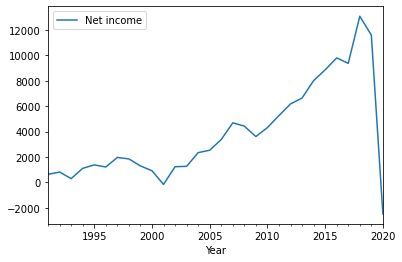

In [75]:
Netincome.plot()

In [76]:
Netincome.describe()

,Net income
count,30.00
mean,3846.04
std,3797.88
min,-2474.00
25%,1219.50
50%,2439.00
75%,5944.25
max,13066.00


In [77]:
alpha = 0.3
model = SimpleExpSmoothing(Netincome['Net income']).fit(alpha)
Predict = model.forecast(2).rename('SES Forecast')
Predict

F:\Python\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
F:\Python\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


2021-01-01   6448.49
2022-01-01   6448.49
Freq: AS-JAN, Name: SES Forecast, dtype: float64

In [78]:
model.params

{'smoothing_level': 0.3,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 874.9180517834212,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

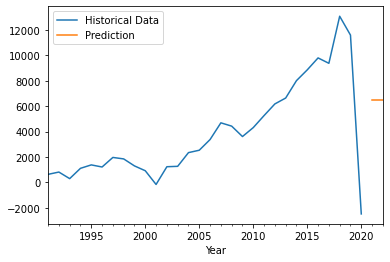

In [79]:
Netincome['Net income'].plot(legend=True,label="Historical Data")
Predict.plot(legend=True, label="Prediction")
plt.legend()

I collected Disney Group’s Net income from 1991 to 2020, all data in millions, and saved them as a CSV file. In Python, I used “Year” as the index of the dataset and adopted it with the Simple Exponential smoothing method. In 2020, Disney's net income received a negative impact of COVID-19, which led to a cliff-like decline. In this way, I set the alpha value to 0.3, so that the model has a greater smoothing effect and less responsive to recent data. The final forecasting value of Net Income in 2021 is around 6,498.49 million Dollars.

# Part 5 Classification Model

This part is to help Disney to better predict whether a particular household who embarks on a Disney Cruise will purchase tickets for a follow-up voyage.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
pd.options.display.float_format = '{:.10f}'.format

# Load the data

In [3]:
return_df=pd.read_csv('cruise_returners.csv')
return_df.head()

,hhold_ID,discount_original,coupon_received,cabin_type,est_inc,season_of_year,ticket_spend,cruise_theme,incidental_spending,park_package,embark_port,res_to_port,number_children,oldest_child_age,dis_plus_sub,return_1065
0,3598,1,1,Verandah,19280.9850000000,Winter,2649,prin_fro,2898.7543430000,1,Vancouver,558,3,6.0000000000,1,0
1,155,1,0,Concierge,825719.9600000000,Spring,2941,Star Wars,2898.7543430000,1,Port Canaveral,280,3,8.0000000000,1,0
2,353,1,0,Oceanview,3755246.4589999998,Fall,2609,Marvel,11750.8293600000,1,Port Canaveral,351,3,3.0000000000,1,0
3,1474,1,1,Oceanview,96831.5500000000,Winter,2367,Marvel,13945.3435100000,1,Copenhagen,314,3,7.0000000000,0,0
4,3272,1,0,Verandah,11027.2490000000,Spring,3021,Marvel,2898.7543430000,1,Copenhagen,342,4,10.0000000000,1,0


In [82]:
return_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hhold_ID             7500 non-null   int64  
 1   discount_original    7500 non-null   int64  
 2   coupon_received      7500 non-null   int64  
 3   cabin_type           7500 non-null   object 
 4   est_inc              7500 non-null   float64
 5   season_of_year       7500 non-null   object 
 6   ticket_spend         7500 non-null   int64  
 7   cruise_theme         6250 non-null   object 
 8   incidental_spending  7500 non-null   float64
 9   park_package         7500 non-null   int64  
 10  embark_port          7500 non-null   object 
 11  res_to_port          7500 non-null   int64  
 12  number_children      7500 non-null   int64  
 13  oldest_child_age     7130 non-null   float64
 14  dis_plus_sub         7500 non-null   int64  
 15  return_1065          7500 non-null   i

Text(0, 0.5, 'Data type')

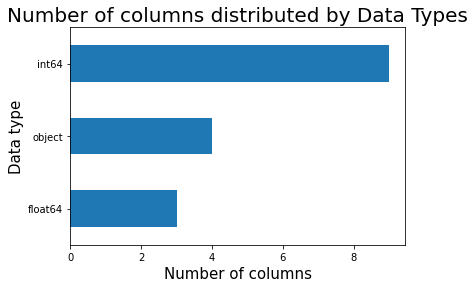

In [83]:
# Seeing the distribution of data types we are working with
return_df.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns distributed by Data Types',fontsize=20)
plt.xlabel('Number of columns',fontsize=15)
plt.ylabel('Data type',fontsize=15)

In [84]:
return_df.shape

(7500, 16)

In [85]:
# check if has duplicate data
print(return_df.duplicated().sum())

0


# Data Clearning(Missing values & Outliers)

In [86]:
# checking the missing data
return_df.isnull().mean().sort_values(ascending=False)

cruise_theme          0.1666666667
oldest_child_age      0.0493333333
return_1065           0.0000000000
dis_plus_sub          0.0000000000
number_children       0.0000000000
res_to_port           0.0000000000
embark_port           0.0000000000
park_package          0.0000000000
incidental_spending   0.0000000000
ticket_spend          0.0000000000
season_of_year        0.0000000000
est_inc               0.0000000000
cabin_type            0.0000000000
coupon_received       0.0000000000
discount_original     0.0000000000
hhold_ID              0.0000000000
dtype: float64

In [1]:
import missingno as msno

Text(0.5, 1.0, 'Missing value distribution')

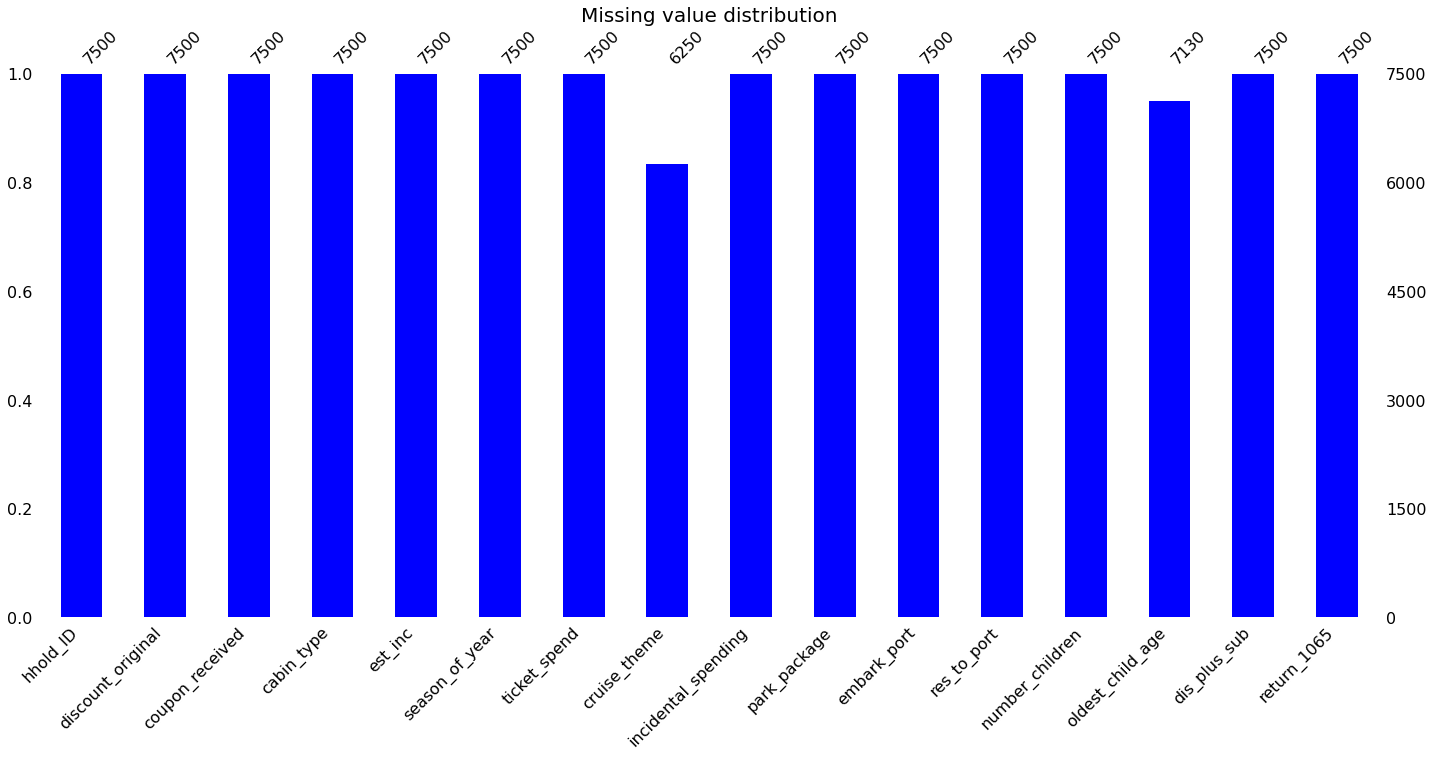

In [5]:
# visualize the missing value distribution
msno.bar(return_df,color='blue')
plt.title('Missing value distribution',fontsize=20)

It shows that Cruise_theme and oldest_child_age exist missing value.

##### cruise_theme

In [87]:
return_df['cruise_theme'].value_counts()

Princess/Frozen    1275
Marvel             1260
Star Wars          1245
starwars           1238
prin_fro           1232
Name: cruise_theme, dtype: int64

The truth is that 'Star Wars' and 'starwars' was the same things, so we need to deal with it.

In [6]:
return_df['cruise_theme'].replace(to_replace=['Star Wars','starwars'], value='StarWars', inplace=True)
# check the conlumn again
return_df['cruise_theme'].value_counts()

StarWars           2483
Princess/Frozen    1275
Marvel             1260
prin_fro           1232
Name: cruise_theme, dtype: int64

Since some cruise do not have themes, so we replace '0' with missing value.

In [7]:
return_df['cruise_theme'].fillna(0, inplace=True)
return_df['cruise_theme'].isnull().sum()

0

##### number_children

In [90]:
return_df['number_children'].value_counts()

 3    2280
 2    2157
 1    1196
 4    1141
 0     320
 5     302
 6      51
-1      47
 7       3
-2       3
Name: number_children, dtype: int64

Text(0.5, 1.0, 'Distribution of number_children')

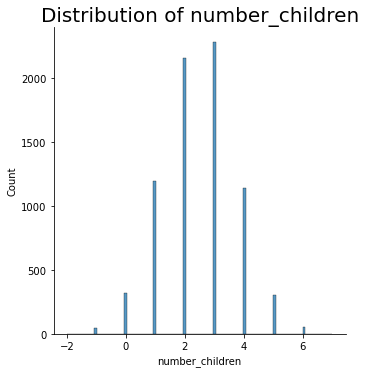

In [8]:
sns.displot(return_df['number_children'])
plt.title('Distribution of number_children',fontsize=20)

The plot shows that 'number_children' exists outliers since the number_children must be equal or more than 0, so we decide to replace these extreme value with 0.

In [92]:
return_df= return_df.loc[return_df['number_children']!= -1]
return_df['number_children'].unique()

array([ 3,  4,  1,  5,  2,  6,  0,  7, -2], dtype=int64)

In [93]:
return_df= return_df.loc[return_df['number_children']!= -2]
return_df['number_children'].unique()

array([3, 4, 1, 5, 2, 6, 0, 7], dtype=int64)

##### oldest_child_age

In [94]:
return_df['oldest_child_age'].value_counts()

6.0000000000     507
14.0000000000    478
13.0000000000    474
5.0000000000     472
17.0000000000    471
4.0000000000     460
3.0000000000     460
12.0000000000    441
8.0000000000     438
10.0000000000    436
11.0000000000    420
16.0000000000    418
7.0000000000     417
9.0000000000     412
15.0000000000    401
2.0000000000     223
18.0000000000    202
Name: oldest_child_age, dtype: int64

In [95]:
return_df[['oldest_child_age','number_children']].head()

,oldest_child_age,number_children
0,6.0000000000,3
1,8.0000000000,3
2,3.0000000000,3
3,7.0000000000,3
4,10.0000000000,4


In [96]:
return_df[return_df['number_children']==0].head()

,hhold_ID,discount_original,coupon_received,cabin_type,est_inc,season_of_year,ticket_spend,cruise_theme,incidental_spending,park_package,embark_port,res_to_port,number_children,oldest_child_age,dis_plus_sub,return_1065
307,2513,1,0,Inside,34337.1000000000,Spring,1556,Princess/Frozen,1581.4414145332,1,Vancouver,20,0,nan,0,0
315,3823,1,0,Oceanview,1112063.6499999999,Spring,2579,0,1154.9023405738,1,Vancouver,73,0,nan,0,0
319,3858,1,1,Concierge,3189.6830000000,Spring,2855,Marvel,3376.9887000281,1,Vancouver,93,0,nan,0,1
344,1816,1,0,Oceanview,99359.6970000000,Winter,1661,StarWars,1725.4252534300,1,San Diego,38,0,nan,0,0
354,202,1,0,Verandah,765.0080000000,Fall,2570,prin_fro,2706.1731559824,1,San Diego,32,0,nan,0,1


We filter the dataFrame given that the number of children is equal to 0, indicating that at the same time,the variable called oldest_child_age shows "NaN", because this househould exactly didn't have any children.

In [97]:
#  replace 0 with missing value given the conidtion that number_childeren is equal to 0.
return_df.loc[(return_df['number_children']==0),'oldest_child_age']=0

In [98]:
return_df['number_children'].isnull().sum()

0

In [100]:
# Check again for NaN under an entire DataFrame:
return_df.isnull().values.any()

False

In [101]:
# Drop column id since id is unique identifier for everyone.,there is no use to put it into model
return_df=return_df.drop('hhold_ID',axis=1)

In [102]:
print("So now we are left with",return_df.shape,"rows&columns.")

So now we are left with (7450, 15) rows&columns.


# Exploratory Data Analysis (EDA)

Let us explore the dataset to have a better understanding of the data.

In [103]:
return_df.head()

,discount_original,coupon_received,cabin_type,est_inc,season_of_year,ticket_spend,cruise_theme,incidental_spending,park_package,embark_port,res_to_port,number_children,oldest_child_age,dis_plus_sub,return_1065
0,1,1,Verandah,19280.9850000000,Winter,2649,prin_fro,2898.7543430091,1,Vancouver,558,3,6.0000000000,1,0
1,1,0,Concierge,825719.9600000000,Spring,2941,StarWars,2898.7543430091,1,Port Canaveral,280,3,8.0000000000,1,0
2,1,0,Oceanview,3755246.4589999998,Fall,2609,Marvel,11750.8293638609,1,Port Canaveral,351,3,3.0000000000,1,0
3,1,1,Oceanview,96831.5500000000,Winter,2367,Marvel,13945.3435115103,1,Copenhagen,314,3,7.0000000000,0,0
4,1,0,Verandah,11027.2490000000,Spring,3021,Marvel,2898.7543430091,1,Copenhagen,342,4,10.0000000000,1,0


### outcome variable

In [104]:
return_df['return_1065'].value_counts(normalize =True)

0   0.5197315436
1   0.4802684564
Name: return_1065, dtype: float64

The result tells us that 51.97% household booked a subquent cruise within 1065 days of booking the original cruise, but 48% household didn't, which means almost one half of household did't return to original cruise again, we need to dig out the reason for that to solve problems effectively.

In [105]:
# Average values for each group have the following results:
return_df.groupby(['return_1065']).mean()

,discount_original,coupon_received,est_inc,ticket_spend,incidental_spending,park_package,res_to_port,number_children,oldest_child_age,dis_plus_sub
return_1065,,,,,,,,,,
0,0.4524793388,0.2603305785,514951.2121352732,2326.8938533058,7262.3643383384,0.4393078512,77.7716942149,2.4121900826,9.8414256198,0.3576962810
1,0.3247624371,0.2529346003,636369.9105951415,2319.9594745668,8142.5259747102,0.2912241476,65.9955282281,2.6302403577,9.1014533259,0.3476802683


In [106]:
#pd.pivot_table(return_df, values='return_1065', index=['cabin_type', 'embark_port'])

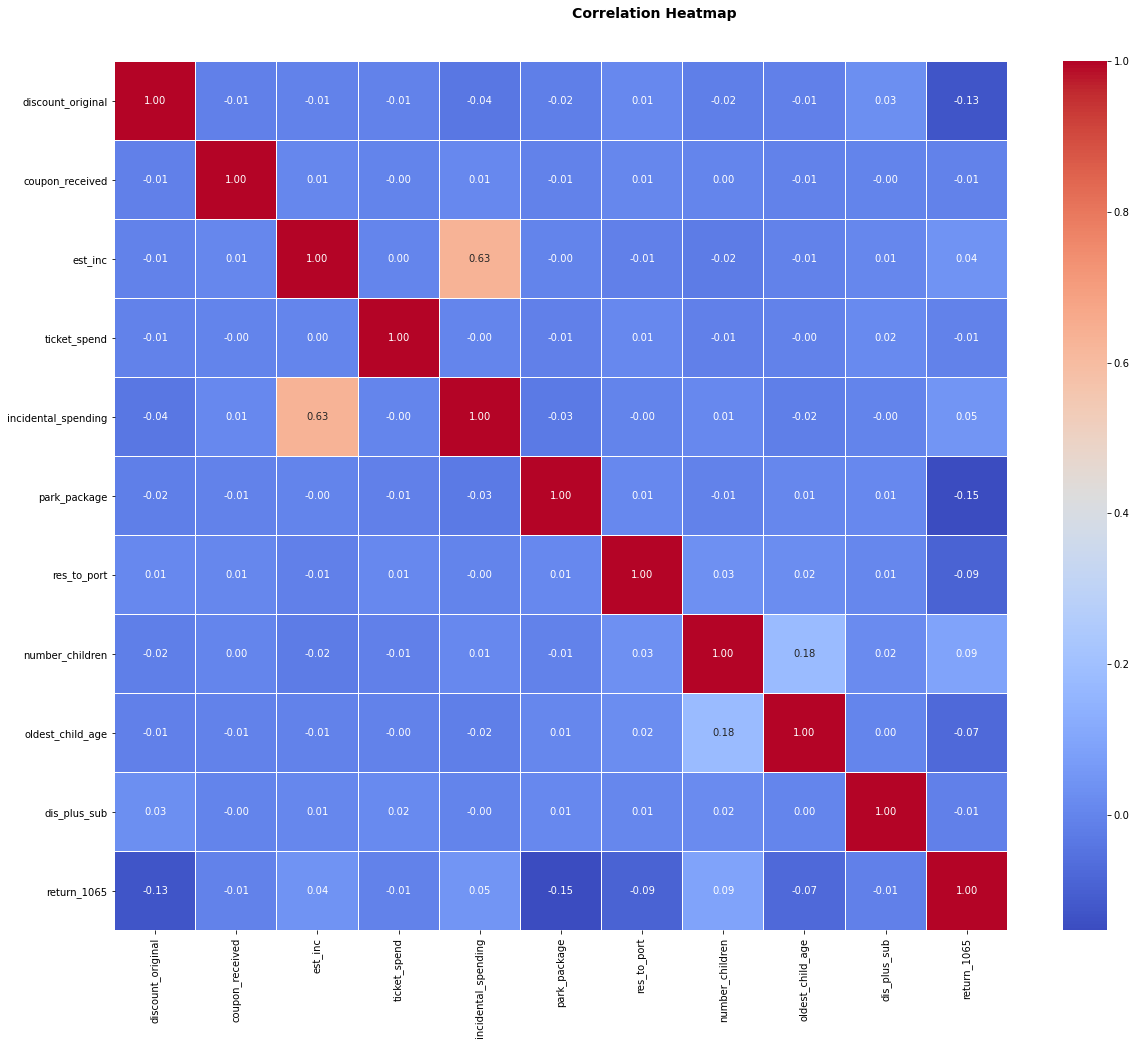

In [107]:
# visualize the correlation between numerical variables
fig, (ax) = plt.subplots(1, 1, figsize=(20,15))
corr = return_df.corr()
hm = sns.heatmap(corr, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('Correlation Heatmap', 
              fontsize=14, 
              fontweight='bold')

ax.figure.savefig('correlation.png',bbox_inches="tight")

Notes that return_1065 generally don't have strong correlation relationship with others variables based on its correlation coeffcient, but the estimate income and incidental spending has strong correlation positive relationship between them because its correlation coeffcient is 0.63, which means those household whose has greater amount of annual income are more likely to allocate more money on traveling. 

In [108]:
# Feature transformation
#return_df['spending_perc']=(return_df['incidental_spending']+return_df['ticket_spend'])/return_df['est_inc']
#return_df['spending_perc'].head()

<AxesSubplot:xlabel='season_of_year', ylabel='count'>

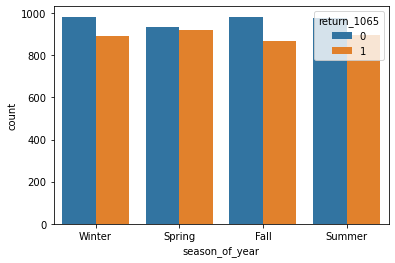

In [109]:
sns.countplot(x=return_df['season_of_year'],hue=return_df['return_1065'])

The plot shows that it is more possible for households to come back to original cruise during the spring, compared with the winner, I guess it is possilbly related to good weather, so families prefer to enjoy going outside and spend more time on playing at Disney which provides more fun activities during this period.

In [110]:
# computes a frequency table
pd.crosstab(return_df['embark_port'],return_df['return_1065'],normalize='columns')

return_1065,0,1
embark_port,,
Barcelona,0.1867252066,0.1601453326
Copenhagen,0.1859504132,0.1439351593
New York,0.1740702479,0.1461710453
Port Canaveral,0.1745867769,0.1693683622
San Diego,0.1443698347,0.1702068195
Vancouver,0.1342975207,0.2101732812


Notes that household, who lefts from Port Vancouver as the port of embarkation, has the highest probability of becoming returned customers about original cruise at Disney.

F:\Python\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_children', ylabel='count'>

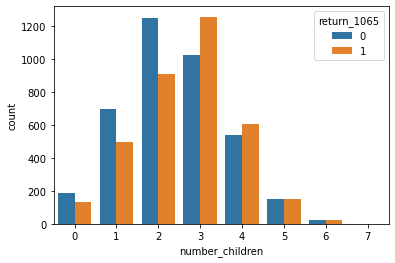

In [111]:
sns.countplot(return_df['number_children'],hue=return_df['return_1065'])

Overall, it shows that the faimliy who has the three childen was most likely to come back to original curise but the household whose the numer of children is 2 was not willing to return, so we cannot prove that the more children the household has,the more possibility they return to original cruise.

F:\Python\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='coupon_received', ylabel='count'>

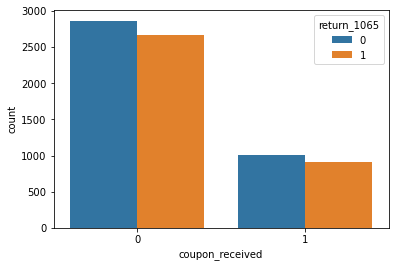

In [112]:
sns.countplot(return_df['coupon_received'],hue=return_df['return_1065'])

We could see that coupons promotion didn't make a huge impact on getting more regular customers to come back the original curise, so we need to make customer segmentation & clustering analysis and send coupons effectively to those who are interested on getting more discounts on curise by using coupons. 

F:\Python\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dis_plus_sub', ylabel='count'>

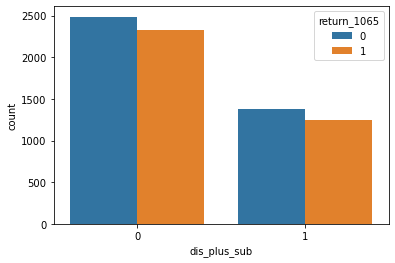

In [113]:
sns.countplot(return_df['dis_plus_sub'],hue=return_df['return_1065'])

Before making this plot, I assume that the household who is subscribes to Disney Plus(a streaming video service),regarded as'loyal customer', are more likely to come back to cruise and enjoy these services. However, the plot shows that households without buying Disney Plus has higher likelihood of becoming returned customers.It's totally different than I expected here.

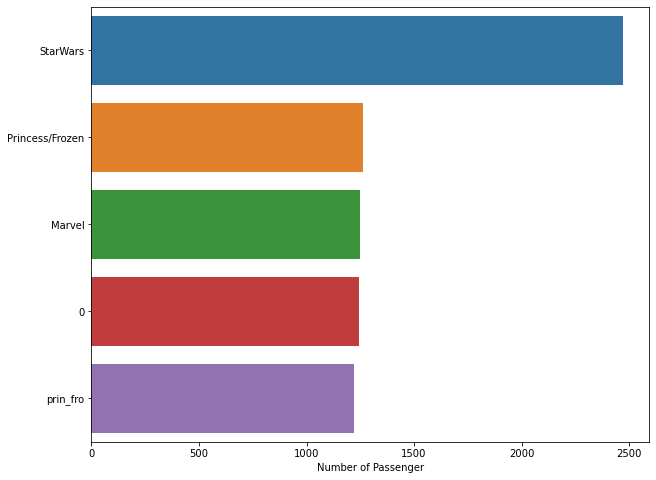

In [114]:
plt.figure(figsize=(10,8))
sns.barplot(x=return_df['cruise_theme'].value_counts().values,y=return_df['cruise_theme'].value_counts().index)
plt.xlabel("Number of Passenger")
plt.show()

It shows that most household prefer to choose StarWars theme compared with other themes.

In [115]:
pd.crosstab(return_df['cruise_theme'],return_df["return_1065"],normalize='columns').T

cruise_theme,0,Marvel,Princess/Frozen,StarWars,prin_fro
return_1065,,,,,
0,0.1590909091,0.1720041322,0.1720041322,0.3292871901,0.1676136364
1,0.1752375629,0.1634991615,0.1665735048,0.3342649525,0.1604248183


When it comes to curise theme, those family whose purchased the StarWars theme is more likely to return the orginal curise in general, showing that StarWars maintains excellent performance in Disney's theme. 

#### Dummified Some Categorical Variables

Check the categorical variable containing counts of unique values

In [116]:
return_df['cabin_type'].value_counts()

Concierge    1887
Inside       1875
Oceanview    1864
Verandah     1824
Name: cabin_type, dtype: int64

In [117]:
return_df['season_of_year'].value_counts()

Winter    1873
Summer    1873
Spring    1855
Fall      1849
Name: season_of_year, dtype: int64

In [118]:
return_df['embark_port'].value_counts()

Barcelona         1296
Port Canaveral    1282
Vancouver         1272
Copenhagen        1235
New York          1197
San Diego         1168
Name: embark_port, dtype: int64

In [119]:
return_df['cruise_theme'].value_counts()

StarWars           2471
Princess/Frozen    1262
Marvel             1251
0                  1243
prin_fro           1223
Name: cruise_theme, dtype: int64

In [120]:
# Dummifies these categorical variables, remind that drop_first=True means drop one level 
return_df2= pd.get_dummies(return_df, drop_first=True, columns=['cabin_type','season_of_year',
                                                              'embark_port','cruise_theme'])

In [121]:
return_df2.head()

,discount_original,coupon_received,est_inc,ticket_spend,incidental_spending,park_package,res_to_port,number_children,oldest_child_age,dis_plus_sub,...,season_of_year_Winter,embark_port_Copenhagen,embark_port_New York,embark_port_Port Canaveral,embark_port_San Diego,embark_port_Vancouver,cruise_theme_Marvel,cruise_theme_Princess/Frozen,cruise_theme_StarWars,cruise_theme_prin_fro
0,1,1,19280.9850000000,2649,2898.7543430091,1,558,3,6.0000000000,1,...,1,0,0,0,0,1,0,0,0,1
1,1,0,825719.9600000000,2941,2898.7543430091,1,280,3,8.0000000000,1,...,0,0,0,1,0,0,0,0,1,0
2,1,0,3755246.4589999998,2609,11750.8293638609,1,351,3,3.0000000000,1,...,0,0,0,1,0,0,1,0,0,0
3,1,1,96831.5500000000,2367,13945.3435115103,1,314,3,7.0000000000,0,...,1,1,0,0,0,0,1,0,0,0
4,1,0,11027.2490000000,3021,2898.7543430091,1,342,4,10.0000000000,1,...,0,1,0,0,0,0,1,0,0,0


In [122]:
return_df2.columns

Index(['discount_original', 'coupon_received', 'est_inc', 'ticket_spend',
       'incidental_spending', 'park_package', 'res_to_port', 'number_children',
       'oldest_child_age', 'dis_plus_sub', 'return_1065', 'cabin_type_Inside',
       'cabin_type_Oceanview', 'cabin_type_Verandah', 'season_of_year_Spring',
       'season_of_year_Summer', 'season_of_year_Winter',
       'embark_port_Copenhagen', 'embark_port_New York',
       'embark_port_Port Canaveral', 'embark_port_San Diego',
       'embark_port_Vancouver', 'cruise_theme_Marvel',
       'cruise_theme_Princess/Frozen', 'cruise_theme_StarWars',
       'cruise_theme_prin_fro'],
      dtype='object')

In [123]:
#X = return_df2.drop(['return_1065','incidental_spending','ticket_spend','est_inc'], axis=1)
#X.shape

In [124]:
# Putting feature variable to X
X = return_df2.drop(['return_1065'], axis=1)
X.shape

(7450, 25)

In [125]:
# Putting response variable to y
y=return_df2['return_1065']
y.shape

(7450,)

In [126]:
# standardize features
#cols = ['est_inc','ticket_spend','incidental_spending','res_to_port','number_children','oldest_child_age']

In [127]:
#from sklearn.preprocessing import StandardScaler
#for col in cols:
    #X['scaled_'+col] = scaler.fit_transform(np.array(X[col]).reshape(-1, 1))
    #X.drop(col,axis=1, inplace=True)
#X.head()

# Building the Model and Predictions

### Part1- Logistic Regression Model

In [128]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=654)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (5215, 25) (5215,)
Test set: (2235, 25) (2235,)


In [129]:
# build the model
LR= LogisticRegression(C=1.0)
# building model with training data
LR.fit(X_train, y_train)

LogisticRegression()

In [130]:
# prediction using testing dataset
y_prediction = LR.predict(X_test)

In [131]:
# check the probaility
y_predict_prob = LR.predict_proba(X_test)
y_predict_prob

array([[ 0.510,  0.490],
       [ 0.524,  0.476],
       [ 0.537,  0.463],
       ...,
       [ 0.520,  0.480],
       [ 0.543,  0.457],
       [ 0.512,  0.488]])

In [132]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_prediction)
print(confusion_matrix)

[[1029  131]
 [ 916  159]]


In [133]:
#  Calculating the accuracy by comparing with atual test outcome and  model predictions.
from sklearn.metrics import accuracy_score
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_prediction))) 

Accuracy of logistic regression classifier on test set: 0.53


In [134]:
# Create a  classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.53      0.89      0.66      1160
           1       0.55      0.15      0.23      1075

    accuracy                           0.53      2235
   macro avg       0.54      0.52      0.45      2235
weighted avg       0.54      0.53      0.46      2235



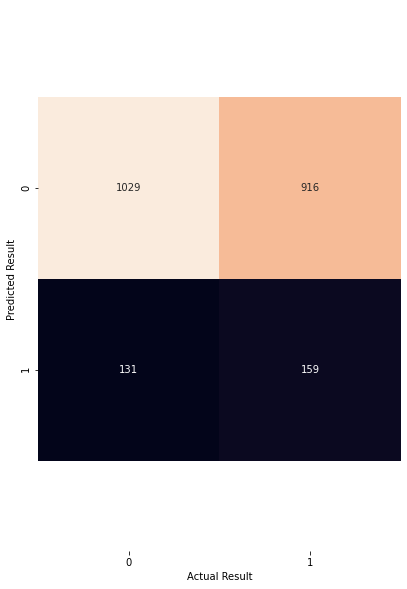

In [135]:
%matplotlib inline
plt.figure(figsize=(20,10))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_prediction, y_test)
sns.heatmap(mat, square=True, fmt='g',annot=True, cbar=False)
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b)
plt.show() 

Compare the model’s accuracy against the training set vs. accuracy against the test set

In [136]:
# using train data
pred_train =LR.predict(X_train)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(accuracy_score(y_train,pred_train)))

Accuracy of logistic regression classifier on train set: 0.53


In [137]:
# using test data
pred_test=LR.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, pred_test)))

Accuracy of logistic regression classifier on test set: 0.53


The result tells us that the logitic regression model performance is stable.

In [138]:
a=LR.predict_proba(X_test)[:,1]
a

array([ 0.490,  0.476,  0.463, ...,  0.480,  0.457,  0.488])

In [139]:
pd.DataFrame(data=LR.coef_.transpose(),index=X_train.columns,columns=['Coef']).sort_values(by='Coef',ascending=False)

,Coef
incidental_spending,0.0000086138
embark_port_Vancouver,0.0000000179
est_inc,0.0000000154
number_children,0.0000000034
embark_port_San Diego,0.0000000015
season_of_year_Spring,0.0000000014
cruise_theme_StarWars,-0.0000000039
embark_port_Port Canaveral,-0.0000000043
cabin_type_Verandah,-0.0000000059
cruise_theme_Princess/Frozen,-0.0000000067


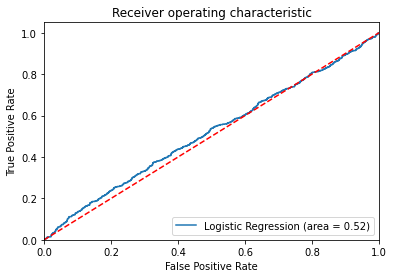

In [140]:
# ROC Curve work as metrics to check model performance 
logit_roc_auc = roc_auc_score(y_test, LR.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Part2-Random Forest Model

In [141]:
# copy same dataframe
return_df3=return_df.copy()
return_df3.head()

,discount_original,coupon_received,cabin_type,est_inc,season_of_year,ticket_spend,cruise_theme,incidental_spending,park_package,embark_port,res_to_port,number_children,oldest_child_age,dis_plus_sub,return_1065
0,1,1,Verandah,19280.9850000000,Winter,2649,prin_fro,2898.7543430091,1,Vancouver,558,3,6.0000000000,1,0
1,1,0,Concierge,825719.9600000000,Spring,2941,StarWars,2898.7543430091,1,Port Canaveral,280,3,8.0000000000,1,0
2,1,0,Oceanview,3755246.4589999998,Fall,2609,Marvel,11750.8293638609,1,Port Canaveral,351,3,3.0000000000,1,0
3,1,1,Oceanview,96831.5500000000,Winter,2367,Marvel,13945.3435115103,1,Copenhagen,314,3,7.0000000000,0,0
4,1,0,Verandah,11027.2490000000,Spring,3021,Marvel,2898.7543430091,1,Copenhagen,342,4,10.0000000000,1,0


In [142]:
# drop ID column
#return_df3=return_df3.drop('hhold_ID',axis=1)

In [143]:
return_df4= pd.get_dummies(return_df3, drop_first=False, columns=['cabin_type','season_of_year',
                                                              'embark_port','cruise_theme'])
return_df4.head()

,discount_original,coupon_received,est_inc,ticket_spend,incidental_spending,park_package,res_to_port,number_children,oldest_child_age,dis_plus_sub,...,embark_port_Copenhagen,embark_port_New York,embark_port_Port Canaveral,embark_port_San Diego,embark_port_Vancouver,cruise_theme_0,cruise_theme_Marvel,cruise_theme_Princess/Frozen,cruise_theme_StarWars,cruise_theme_prin_fro
0,1,1,19280.9850000000,2649,2898.7543430091,1,558,3,6.0000000000,1,...,0,0,0,0,1,0,0,0,0,1
1,1,0,825719.9600000000,2941,2898.7543430091,1,280,3,8.0000000000,1,...,0,0,1,0,0,0,0,0,1,0
2,1,0,3755246.4589999998,2609,11750.8293638609,1,351,3,3.0000000000,1,...,0,0,1,0,0,0,1,0,0,0
3,1,1,96831.5500000000,2367,13945.3435115103,1,314,3,7.0000000000,0,...,1,0,0,0,0,0,1,0,0,0
4,1,0,11027.2490000000,3021,2898.7543430091,1,342,4,10.0000000000,1,...,1,0,0,0,0,0,1,0,0,0


In [144]:
# Putting feature variable to X
X = return_df4.drop(['return_1065'], axis=1)
X.shape

(7450, 29)

In [145]:
# Putting response variable to y
y=return_df2['return_1065']
y.shape

(7450,)

In [146]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=654)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (5215, 29) (5215,)
Test set: (2235, 29) (2235,)


In [147]:
from sklearn.ensemble import RandomForestClassifier

In [148]:
rf=RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=654)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=654)

In [149]:
param_grid = {
    'n_estimators': [100,150,200],
    'max_depth': [6,8,10],
    'max_features': [12,14,16],
}
#   'max_features': [12, 16, 18],
#  'min_samples_leaf': [2,4, 6],

In [150]:
# GridSearch CV
from sklearn.model_selection import GridSearchCV

CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 10,n_jobs=-1)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'max_depth': 6, 'max_features': 16, 'n_estimators': 100}


In [151]:
# Use GridSearch CV to help us determine the best hyperparameter settings for our model
rf=RandomForestClassifier(n_estimators=100, max_depth=6,max_features=16,random_state=654)

# fit the model
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, max_features=16, random_state=654)

In [152]:
rf_y_predicted=rf.predict(X_test)
rf_y_predicted

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [153]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score

# generate the confusion matrix
print('\nconfustion martix') 
print(confusion_matrix(y_test,rf_y_predicted))

print('\naccuracy')
print(accuracy_score(y_test,rf_y_predicted))
print('\nprecision')
print(precision_score(y_test,rf_y_predicted))

# generate the precision, recall, f-1 score
print('n\classfication report')
print(classification_report(y_test,rf_y_predicted))


confustion martix
[[859 301]
 [453 622]]

accuracy
0.6626398210290828

precision
0.6738894907908992
n\classfication report
              precision    recall  f1-score   support

           0       0.65      0.74      0.69      1160
           1       0.67      0.58      0.62      1075

    accuracy                           0.66      2235
   macro avg       0.66      0.66      0.66      2235
weighted avg       0.66      0.66      0.66      2235



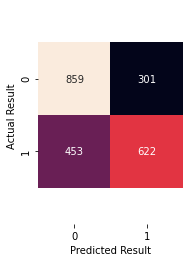

In [154]:
# visualize the confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
predictions = rf.predict(X_test)
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat, fmt='g', square=True, annot=True, cbar=False)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b)
plt.show()

In [155]:
b=rf.predict_proba(X_test)[:,1]
b

array([ 0.670,  0.666,  0.132, ...,  0.702,  0.675,  0.118])

In [156]:
# using train data
pred_train_rf =rf.predict(X_train)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(accuracy_score(y_train,pred_train_rf )))

Accuracy of logistic regression classifier on train set: 0.70


In [157]:
# using testing data
pred_test_rf=rf.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, pred_test_rf)))

Accuracy of logistic regression classifier on test set: 0.66


Compared with logistic regression, the model performance for random forest improves a lot.

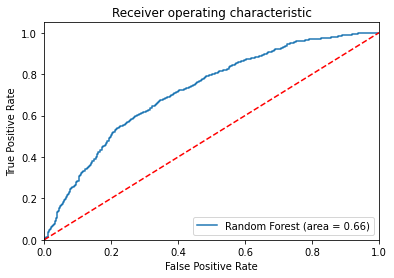

In [158]:
# ROC Curve work as metrics to check model performance 
logit_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The feature importances in a random forest indicate the sum of the reduction in Gini Impurity over all the nodes that are split on that feature. We can use these to try and figure out what predictor variables the random forest considers most important.

In [159]:
# Extract feature importances
feature_importance = pd.DataFrame({'feature': list(X.columns),
                   'importance': rf.feature_importances_}).sort_values('importance', ascending = False)
feature_importance.head(10)

,feature,importance
0,discount_original,0.2010467589
5,park_package,0.1806482270
6,res_to_port,0.1321200511
7,number_children,0.1028639931
8,oldest_child_age,0.0952828764
23,embark_port_Vancouver,0.0664038555
2,est_inc,0.0620919201
3,ticket_spend,0.0493263481
4,incidental_spending,0.0474563693
19,embark_port_Copenhagen,0.0111039658


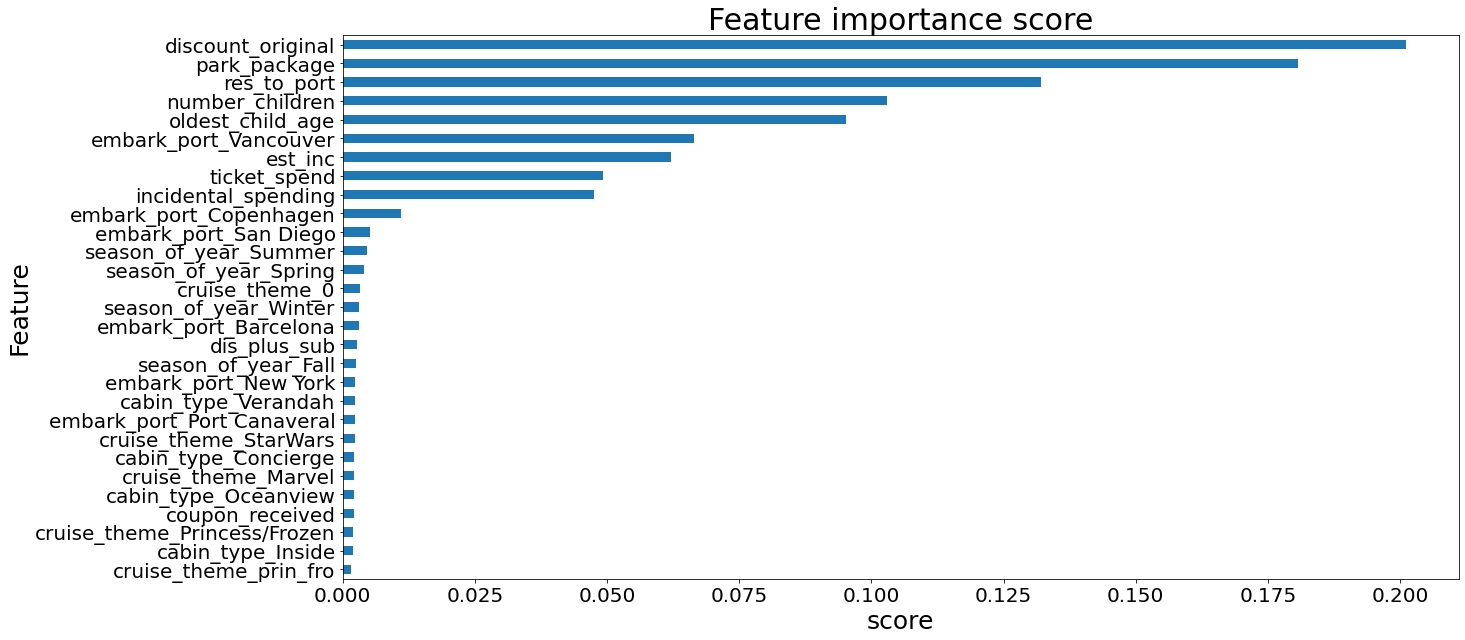

In [160]:
plt.figure(figsize=(20,10))
from sklearn.inspection import permutation_importance
feature_importance=pd.Series(rf.feature_importances_,index=X.columns)
ax=feature_importance.sort_values(ascending=False).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score',fontsize=25)
plt.ylabel('Feature',fontsize=25)
plt.title('Feature importance score',fontsize=30)
plt.tick_params(labelsize=20);

It shows the relative importance or contribution of each feature in the prediction, for example, Discount_original and park_package is relatively more important compared with others, which should be taken into consideration about these fields for improving the customer retention rate.

# Take a try:  Building the model only using important features

### Identify And Select Most Important Features

In [161]:
from sklearn.feature_selection import SelectFromModel

In [162]:
sel = SelectFromModel(rf)
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(max_depth=6, max_features=16,
                                                 random_state=654))

In [163]:
sel.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False])

In [164]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

9

In [165]:
print(selected_feat)

Index(['discount_original', 'est_inc', 'ticket_spend', 'incidental_spending',
       'park_package', 'res_to_port', 'number_children', 'oldest_child_age',
       'embark_port_Vancouver'],
      dtype='object')


### Create A Data Subset With Only The Most Important Features

In [166]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train =sel.transform(X_train)
X_important_test = sel.transform(X_test)

### Train A New Random Forest Classifier Using Only Most Important Features

In [167]:
# Create a new random forest classifier for the most important features
clf_important=RandomForestClassifier(n_estimators=100, max_depth=6,random_state=654)

In [168]:
# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(max_depth=6, random_state=654)

In [169]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (9 Features) Model
accuracy_score(y_test, y_important_pred)

0.6577181208053692

In [170]:
# using train data
y_important_pred_train = clf_important.predict(X_important_train)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(accuracy_score(y_train,y_important_pred_train  )))

Accuracy of logistic regression classifier on train set: 0.70


In [171]:
# using testing data
y_important_pred_test=clf_important.predict(X_important_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test,y_important_pred_test)))

Accuracy of logistic regression classifier on test set: 0.66


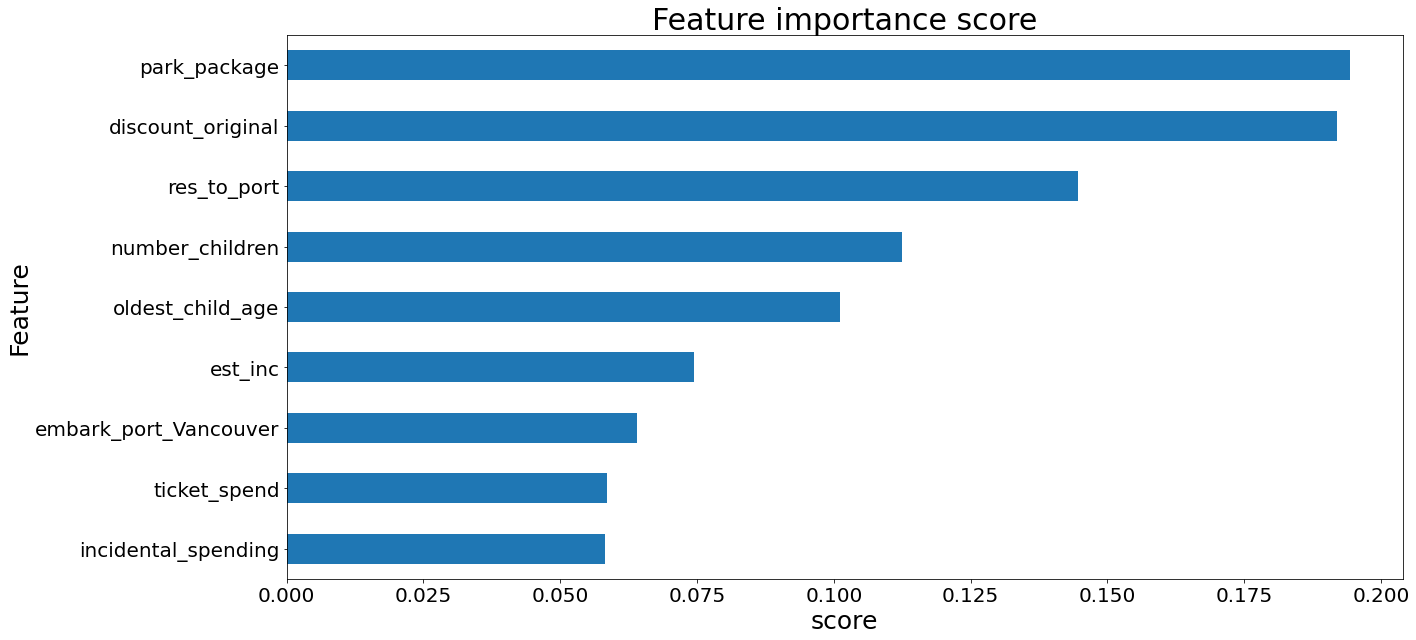

In [172]:
# visualize the feature importance 
plt.figure(figsize=(20,10))
from sklearn.inspection import permutation_importance
feature_importance=pd.Series(clf_important.feature_importances_,selected_feat)
ax=feature_importance.sort_values(ascending=False).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score',fontsize=25)
plt.ylabel('Feature',fontsize=25)
plt.title('Feature importance score',fontsize=30)
plt.tick_params(labelsize=20);

As can be seen by the accuracy scores, the performance of our original model which contained all features is exactly same as our 'limited'model which contained only nine features against traning data as well as testing data set. By selecting the most important feature into our model, we make our model more simple to interpret and reduce the variance of the model,in addition, it could reduce the computational cost (and time) of training a model. 

# Make up three households from different background

Assign three person a value for each predictor variable in this model, and store the results in a new dataframe. Now, put these person through this model.

### Mary_household(middle-class income family)

In [173]:
print(selected_feat)

Index(['discount_original', 'est_inc', 'ticket_spend', 'incidental_spending',
       'park_package', 'res_to_port', 'number_children', 'oldest_child_age',
       'embark_port_Vancouver'],
      dtype='object')


In [174]:
Mary_df=pd.DataFrame([{
    'discount_original':1, 'coupon_received':0, 'est_inc':120000, 'ticket_spend':2500,
       'incidental_spending':20000, 'park_package':0, 'res_to_port':30, 'number_children':3,
       'oldest_child_age':6, 'dis_plus_sub':0, 'cabin_type_Concierge':0,
       'cabin_type_Inside':0, 'cabin_type_Oceanview':1, 'cabin_type_Verandah':0,
       'season_of_year_Fall':0, 'season_of_year_Spring':1, 'season_of_year_Summer':0,
       'season_of_year_Winter':0, 'embark_port_Barcelona':0,
       'embark_port_Copenhagen':0, 'embark_port_New York':0,
       'embark_port_Port Canaveral':0, 'embark_port_San Diego':1,
       'embark_port_Vancouver':0, 'cruise_theme_0':0, 'cruise_theme_Marvel':0,
       'cruise_theme_Princess/Frozen':1, 'cruise_theme_StarWars':0,
       'cruise_theme_prin_fro':0
    }])
Mary_df.shape

(1, 29)

In [175]:
rf_predict_Mary =rf.predict(Mary_df)
rf_predict_Mary

array([1], dtype=int64)

In [176]:
rf.predict_proba(Mary_df).round(3) 

array([[ 0.316,  0.684]])

It shows that the probability that Mary's household will return to Disney is 68.4%. 

In [177]:
X.describe()

,discount_original,coupon_received,est_inc,ticket_spend,incidental_spending,park_package,res_to_port,number_children,oldest_child_age,dis_plus_sub,...,embark_port_Copenhagen,embark_port_New York,embark_port_Port Canaveral,embark_port_San Diego,embark_port_Vancouver,cruise_theme_0,cruise_theme_Marvel,cruise_theme_Princess/Frozen,cruise_theme_StarWars,cruise_theme_prin_fro
count,7450.0000000000,7450.0000000000,7450.0000000000,7450.0000000000,7450.0000000000,7450.0000000000,7450.0000000000,7450.0000000000,7450.0000000000,7450.0000000000,...,7450.0000000000,7450.0000000000,7450.0000000000,7450.0000000000,7450.0000000000,7450.0000000000,7450.0000000000,7450.0000000000,7450.0000000000,7450.0000000000
mean,0.3911409396,0.2567785235,573264.7830197570,2323.5634899329,7685.0782088001,0.3681879195,72.1159731544,2.5169127517,9.4860402685,0.3528859060,...,0.1657718121,0.1606711409,0.1720805369,0.1567785235,0.1707382550,0.1668456376,0.1679194631,0.1693959732,0.3316778523,0.1641610738
std,0.4880386006,0.4368854923,1428801.1923095507,568.1222157154,9744.4626341959,0.4823451094,63.3199643200,1.2117898143,4.9755887942,0.4778996751,...,0.3719006366,0.3672519970,0.3774757630,0.3636162335,0.3763053425,0.3728630206,0.3738198419,0.3751264667,0.4708475471,0.3704465358
min,0.0000000000,0.0000000000,0.9070000000,1102.0000000000,13.6652788904,0.0000000000,2.0000000000,0.0000000000,0.0000000000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
25%,0.0000000000,0.0000000000,7187.7475000000,1903.0000000000,2898.7543430091,0.0000000000,33.0000000000,2.0000000000,5.0000000000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
50%,0.0000000000,0.0000000000,49371.3811064000,2318.0000000000,2904.4508321449,0.0000000000,54.0000000000,3.0000000000,10.0000000000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
75%,1.0000000000,1.0000000000,332341.2797500000,2733.0000000000,9520.2882662330,1.0000000000,89.0000000000,3.0000000000,14.0000000000,1.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000
max,1.0000000000,1.0000000000,9938625.9430000000,3600.0000000000,69975.7210668232,1.0000000000,1283.0000000000,7.0000000000,18.0000000000,1.0000000000,...,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000


### Jack_Household(rich family)

In [178]:
Jack_df=pd.DataFrame([{
    'discount_original':0, 'coupon_received':0, 'est_inc':700000, 'ticket_spend':5000,
       'incidental_spending':30000, 'park_package':0, 'res_to_port':700, 'number_children':6,
       'oldest_child_age':10, 'dis_plus_sub':1, 'cabin_type_Concierge':0,
       'cabin_type_Inside':0, 'cabin_type_Oceanview':1, 'cabin_type_Verandah':0,
       'season_of_year_Fall':0, 'season_of_year_Spring':0, 'season_of_year_Summer':1,
       'season_of_year_Winter':0, 'embark_port_Barcelona':0,
       'embark_port_Copenhagen':0, 'embark_port_New York':1,
       'embark_port_Port Canaveral':0, 'embark_port_San Diego':0,
       'embark_port_Vancouver':0, 'cruise_theme_0':0, 'cruise_theme_Marvel':0,
       'cruise_theme_Princess/Frozen':0, 'cruise_theme_StarWars':1,
       'cruise_theme_prin_fro':0
    }])
Jack_df.shape

(1, 29)

In [179]:
rf_predict_Jack =rf.predict(Jack_df)
rf_predict_Jack

array([0], dtype=int64)

In [180]:
rf.predict_proba(Jack_df).round(3) 

array([[ 0.866,  0.134]])

It shows that the probability that Jack's household will not return to Disney is 86.6%. 

### Tony_Household(low-income family)

In [181]:
Tony_df=pd.DataFrame([{
    'discount_original':1, 'coupon_received':1, 'est_inc':7000, 'ticket_spend':2500,
       'incidental_spending':500, 'park_package':1, 'res_to_port':15, 'number_children':0,
       'oldest_child_age':0, 'dis_plus_sub':0, 'cabin_type_Concierge':0,
       'cabin_type_Inside':1, 'cabin_type_Oceanview':0, 'cabin_type_Verandah':0,
       'season_of_year_Fall':0, 'season_of_year_Spring':1, 'season_of_year_Summer':0,
       'season_of_year_Winter':0, 'embark_port_Barcelona':0,
       'embark_port_Copenhagen':0, 'embark_port_New York':0,
       'embark_port_Port Canaveral':0, 'embark_port_San Diego':1,
       'embark_port_Vancouver':0, 'cruise_theme_0':0, 'cruise_theme_Marvel':1,
       'cruise_theme_Princess/Frozen':0, 'cruise_theme_StarWars':0,
       'cruise_theme_prin_fro':0
    }])
Tony_df.shape

(1, 29)

In [182]:
rf_predict_Tony =rf.predict(Tony_df)
rf_predict_Tony

array([0], dtype=int64)

In [183]:
rf.predict_proba(Tony_df).round(3) 

array([[ 0.704,  0.296]])

It shows that the probability that Tony's household will not return to Disney is 70.4%

# Summary for classification model

For this project, our goal is to better predict whether a particular household who embarks on a Disney Cruise will purchase tickets for a follow-up voyage. Before we making models, we perform the EDA for our datasets to understand the relationship between the predictors and the response(whether customer return to the original cruise or not), for example, it is more possible for households to come back to original cruise during the spring, compared with the winner, and we find some interest facts, like coupons promotion & Disney plus subscription don't make a huge impact on getting more customers to come back the original curise, so we need to measure the effectiveness of these promotion activities.

For this classification problem, beside EDA, we use the logistic regression and random forest for our model. By comparing with accuracy againist traning set and testing set, it shows that random forest performed better than logistic regression to predict the outcome variables.Every prediction can be trivially presented as a sum of feature contributions, showing how the features lead to a particular prediction.By doing random forest model, we could get the relative feature importance,which helps in selecting the most contributing features for the classifier, such as 'discount_original', 'est_inc', 'ticket_spend', 'incidental_spending', 'park_package', 'res_to_port', 'number_children', 'oldest_child_age',  so it gives estimates of what variables are important in the classification problems.

With its magical and personalized approach to customer experience, Disney and its theme parks have created a passionately loyal fan base and realize the importance of customer life time value. We also make up three households from different background, like Mary, Jack, Tony. This prediction analysis including different inputs was done to grasp a practical understanding of which kinds of factors will largerly effect the likelihood of becoming returned customers in the original cruise, we see some interesting insights here:

* Mary's household: The household is predicted to return the orignial curise at Disney. It seems like that this household, labeled as middle-income family with three children, whose residence is close to the port of embarkation, is willing to spend more money on enjoying playing activities in Disney even though they don't receive the coupon and subsribe to Disney plus. As we all know, the Disney fans keep coming back because there's always more to see.Disney should maintain constant interest by making sure there's always something else to notice,creating Interesting&innovative activities. Disney should utilizes all the main social media channels/platforms to engage potential clients. All channels are used to engage and share all their material in a conversational manner. And they also timely interact with loyal fans to maintain stable long-standing relationship for increasing customers loyalty and retention rate for business growth.


* Jack's household:The household is predicted to not return the orignial curise at Disney. It characterized as rich large family with six children, will be more likely to spend money on Disney's curise. They subscribed to Disney plus but did't receive discount&coupon, and their residence is very far from the port of embarkation depart from New York,so it will takes longer time for them to arrive here. It is possible that this family is so busy with their business that they cannot allocate more time on commuting here. For this type of customers, Disney should engage customers directly when customers play activities there, getting views about products and services straight from the people who use them. Sending the short and sweet emalis or messages to customers about customerized traveling route attract their attention.


* Tony's household: The household is predicted to not return the orignial curise at Disney. It, regarded as low-income free-children family,purchased the park package which means that original cruise was booked as part of  a special combination discount package that included admission to a Disney theme park and spent a fewer money on Disney due to limitied budget. Even though their residence is very close to embarkation port, received the coupon and discount on the first curise,they don't have strong willingness to return Disney. For this kind of vistors who are sensitive to affordable price, In order to boost sales, the company could adjust price strategies at specific period and provide multi-day tickets or annual passes or special-offer discount ticket during the slack season, which provide greater value and additional savings for customers.

So by doing such this analysis, it is crucial for Disney to focus the differentiation aspect in all their marketing activities to enhance Disney's huge brand equity and improve customer retention rate& loyalty


# Part 6 AB_Test

In [12]:
import seaborn as sns
import pandas as pd
buckets = pd.read_csv("popcorn_buckets.csv")
buckets.head(10)

,location,bucket,Q1_sales_USD
0,Disneyland Paris,Cinderella,139413.1000000000
1,Disneyland Paris,Star_Wars,138890.4000000000
2,Disneyland Paris,Mermaid,117696.4000000000
3,Disneyland Paris,MickeySuit,176821.9000000000
4,Disneyland Paris,MickeyEars,168442.1000000000
5,Disneyland Paris,RedWhite,93623.9000000000
6,Disneyland Resort,Cinderella,128031.7000000000
7,Disneyland Resort,Star_Wars,144374.3000000000
8,Disneyland Resort,Mermaid,116015.3000000000
9,Disneyland Resort,MickeySuit,174633.1000000000


Text(0.5, 1.0, 'Relationship between Bucket and Sales')

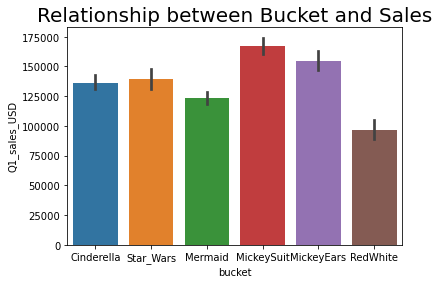

In [14]:
sns.barplot(x="bucket", y="Q1_sales_USD",data=buckets)
plt.title('Relationship between Bucket and Sales',fontsize=20)

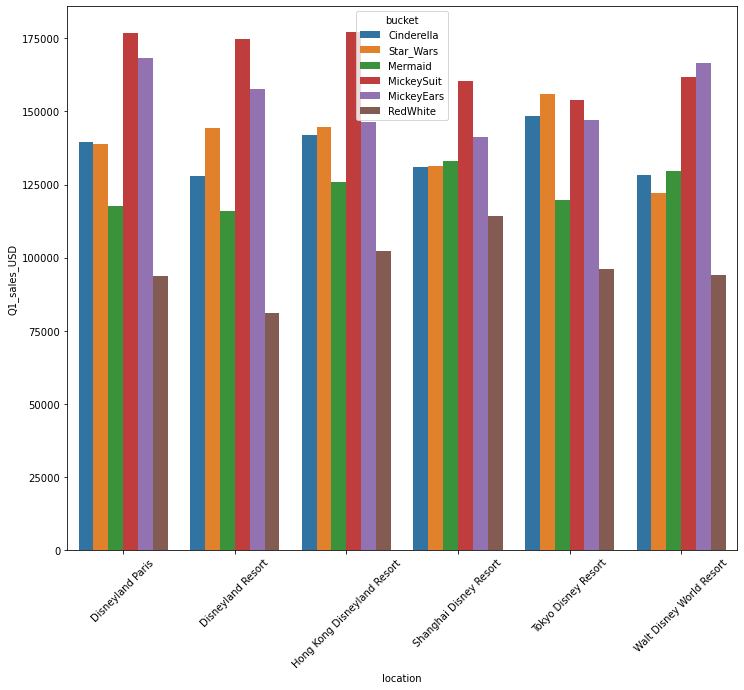

In [186]:
import matplotlib.pyplot as plt
plt.figure(figsize= (12,10))
sns.barplot(x="location",y="Q1_sales_USD",hue="bucket",data=buckets)
ax=plt.gca()
ax.tick_params(axis='x',labelrotation = 45)
plt.title('Relationship between Location & Bucket and sales',fontsize=20)
plt.show()

In [187]:
from scipy.stats import chisquare
import scipy.stats as stats
buckets_Paris = buckets[buckets['location']=="Disneyland Paris"]
buckets_Resort = buckets[buckets['location']=="Disneyland Resort"]
buckets_HK = buckets[buckets['location']=="Hong Kong Disneyland Resort"]
buckets_SH = buckets[buckets['location']=="Shanghai Disney Resort"]
buckets_Tokyo = buckets[buckets['location']=="Tokyo Disney Resort"]
buckets_Walt = buckets[buckets['location']=="Walt Disney World Resort"]

### The t-statistic for Different Locations

Paris vs Resort

In [188]:
tstat, p_value = stats.ttest_ind(buckets_Paris['Q1_sales_USD'],buckets_Resort['Q1_sales_USD'], equal_var=False)
round(p_value,5)

0.77247

Paris vs HK

In [189]:
tstat, p_value = stats.ttest_ind(buckets_Paris['Q1_sales_USD'],buckets_HK['Q1_sales_USD'], equal_var=False)
round(p_value,5)

0.97506

Paris vs SH

In [190]:
tstat, p_value = stats.ttest_ind(buckets_Paris['Q1_sales_USD'],buckets_SH['Q1_sales_USD'], equal_var=False)
round(p_value,5)

0.78646

Paris vs Tokyo

In [191]:
tstat, p_value = stats.ttest_ind(buckets_Paris['Q1_sales_USD'],buckets_Tokyo['Q1_sales_USD'], equal_var=False)
round(p_value,5)

0.89121

Paris vs Walt

In [192]:
tstat, p_value = stats.ttest_ind(buckets_Paris['Q1_sales_USD'],buckets_Walt['Q1_sales_USD'], equal_var=False)
round(p_value,5)

0.75377

Resort vs HK

In [193]:
tstat, p_value = stats.ttest_ind(buckets_Resort['Q1_sales_USD'],buckets_HK['Q1_sales_USD'], equal_var=False)
round(p_value,5)

0.72905

Resort vs SH

In [194]:
tstat, p_value = stats.ttest_ind(buckets_Resort['Q1_sales_USD'],buckets_SH['Q1_sales_USD'], equal_var=False)
round(p_value,5)

0.92059

Resort vs Tokyo

In [195]:
tstat, p_value = stats.ttest_ind(buckets_Resort['Q1_sales_USD'],buckets_Tokyo['Q1_sales_USD'], equal_var=False)
round(p_value,5)

0.84937

Resort vs Walt

In [196]:
tstat, p_value = stats.ttest_ind(buckets_Resort['Q1_sales_USD'],buckets_Walt['Q1_sales_USD'], equal_var=False)
round(p_value,5)

0.99591

HK vs SH

In [197]:
tstat, p_value = stats.ttest_ind(buckets_HK['Q1_sales_USD'],buckets_SH['Q1_sales_USD'], equal_var=False)
round(p_value,5)

0.71469

HK vs Tokyo

In [198]:
tstat, p_value = stats.ttest_ind(buckets_HK['Q1_sales_USD'],buckets_Tokyo['Q1_sales_USD'], equal_var=False)
round(p_value,5)

0.84775

HK vs Walt

In [199]:
tstat, p_value = stats.ttest_ind(buckets_HK['Q1_sales_USD'],buckets_Walt['Q1_sales_USD'], equal_var=False)
round(p_value,5)

0.69958

SH vs Tokyo

In [200]:
tstat, p_value = stats.ttest_ind(buckets_SH['Q1_sales_USD'],buckets_Tokyo['Q1_sales_USD'], equal_var=False)
round(p_value,5)

0.88527

SH vs Walt

In [201]:
tstat, p_value = stats.ttest_ind(buckets_SH['Q1_sales_USD'],buckets_Walt['Q1_sales_USD'], equal_var=False)
round(p_value,5)

0.91178

Tokyo vs Walt

In [202]:
tstat, p_value = stats.ttest_ind(buckets_Tokyo['Q1_sales_USD'],buckets_Walt['Q1_sales_USD'], equal_var=False)
round(p_value,5)

0.83393

### The t-statistic for Different Buckets

Cinderella vs Star_Wars

In [203]:
tstat, p_value = stats.ttest_ind(buckets.loc[buckets['bucket']=='Cinderella','Q1_sales_USD'],buckets.loc[buckets['bucket']=='Star_Wars','Q1_sales_USD'], equal_var=False)
round(p_value,5)

0.57565

Cinderella vs Mermaid

In [204]:
tstat, p_value = stats.ttest_ind(buckets.loc[buckets['bucket']=='Cinderella','Q1_sales_USD'],buckets.loc[buckets['bucket']=='Mermaid','Q1_sales_USD'], equal_var=False)
round(p_value,5)

0.01848

Cinderella vs MickeySuit

In [205]:
tstat, p_value = stats.ttest_ind(buckets.loc[buckets['bucket']=='Cinderella','Q1_sales_USD'],buckets.loc[buckets['bucket']=='MickeySuit','Q1_sales_USD'], equal_var=False)
round(p_value,5)

0.00017

Cinderella vs RedWhite

In [206]:
tstat, p_value = stats.ttest_ind(buckets.loc[buckets['bucket']=='Cinderella','Q1_sales_USD'],buckets.loc[buckets['bucket']=='RedWhite','Q1_sales_USD'], equal_var=False)
round(p_value,5)

5e-05

Cinderella vs MickeyEars

In [207]:
tstat, p_value = stats.ttest_ind(buckets.loc[buckets['bucket']=='Cinderella','Q1_sales_USD'],buckets.loc[buckets['bucket']=='MickeyEars','Q1_sales_USD'], equal_var=False)
round(p_value,5)

0.01069

Star_Wars vs Mermaid

In [208]:
tstat, p_value = stats.ttest_ind(buckets.loc[buckets['bucket']=='Star_Wars','Q1_sales_USD'],buckets.loc[buckets['bucket']=='Mermaid','Q1_sales_USD'], equal_var=False)
round(p_value,5)

0.02095

Star_Wars vs RedWhite

In [209]:
tstat, p_value = stats.ttest_ind(buckets.loc[buckets['bucket']=='Star_Wars','Q1_sales_USD'],buckets.loc[buckets['bucket']=='RedWhite','Q1_sales_USD'], equal_var=False)
round(p_value,5)

7e-05

Star_Wars vs MickeySuit

In [210]:
tstat, p_value = stats.ttest_ind(buckets.loc[buckets['bucket']=='Star_Wars','Q1_sales_USD'],buckets.loc[buckets['bucket']=='MickeySuit','Q1_sales_USD'], equal_var=False)
round(p_value,5)

0.00136

Star_Wars vs MickeyEars

In [211]:
tstat, p_value = stats.ttest_ind(buckets.loc[buckets['bucket']=='Star_Wars','Q1_sales_USD'],buckets.loc[buckets['bucket']=='MickeyEars','Q1_sales_USD'], equal_var=False)
round(p_value,5)

0.04885

Mermaid vs MickeySuit

In [212]:
tstat, p_value = stats.ttest_ind(buckets.loc[buckets['bucket']=='Mermaid','Q1_sales_USD'],buckets.loc[buckets['bucket']=='MickeySuit','Q1_sales_USD'], equal_var=False)
round(p_value,5)

1e-05

Mermaid vs MickeyEars

In [213]:
tstat, p_value = stats.ttest_ind(buckets.loc[buckets['bucket']=='Mermaid','Q1_sales_USD'],buckets.loc[buckets['bucket']=='MickeyEars','Q1_sales_USD'], equal_var=False)
round(p_value,5)

0.00042

Mermaid vs RedWhite

In [214]:
tstat, p_value = stats.ttest_ind(buckets.loc[buckets['bucket']=='Mermaid','Q1_sales_USD'],buckets.loc[buckets['bucket']=='RedWhite','Q1_sales_USD'], equal_var=False)
round(p_value,5)

0.00081

MickeySuit vs MickeyEars

In [215]:
tstat, p_value = stats.ttest_ind(buckets.loc[buckets['bucket']=='MickeySuit','Q1_sales_USD'],buckets.loc[buckets['bucket']=='MickeyEars','Q1_sales_USD'], equal_var=False)
round(p_value,5)

0.06372

MickeySuit vs RedWhite

In [216]:
tstat, p_value = stats.ttest_ind(buckets.loc[buckets['bucket']=='MickeySuit','Q1_sales_USD'],buckets.loc[buckets['bucket']=='RedWhite','Q1_sales_USD'], equal_var=False)
round(p_value,5)

0.0

MickeyEars vs RedWhite

In [217]:
tstat, p_value = stats.ttest_ind(buckets.loc[buckets['bucket']=='MickeyEars','Q1_sales_USD'],buckets.loc[buckets['bucket']=='RedWhite','Q1_sales_USD'], equal_var=False)
round(p_value,5)

0.0

In [218]:
sum(buckets.loc[buckets['bucket']=='Cinderella','Q1_sales_USD']) - sum(buckets.loc[buckets['bucket']=='Star_Wars','Q1_sales_USD'])

-20548.29999999993

In [219]:
sum(buckets.loc[buckets['bucket']=='MickeySuit','Q1_sales_USD']) - sum(buckets.loc[buckets['bucket']=='MickeyEars','Q1_sales_USD'])

77393.29999999993

# Summary for AB Test

* Process: I brought the file popcorn_buckets.csv in my environment.Then I used the Seaborn to visualize the sales status for each bucket with bar polt,we could see that the total amount of sales of Mickey Suit was the highest. As well, in order to gain an insight into sales volume for each product in different locations, I used the Seaborn again to visualize it with x axit equal to location, y axis equal to "Q1_sales_USD" and bucket hue. In addition to know whether there were head-to-head popcorn bucket matchups showing meaningfully different results, I used t-statistic methold to verify. In the first test, I firstly compared pattern of sales for each location and then compared pattern of sales in each bucket,then in order to help Disney narrow down its offerings, I first filtered which pairs of t-statisitc's p value was more than 0.05 and gave up the products with lower sales.


* Conclusions: According to the barplot above, Mickey Suit almost was the most selling popcorn buckets in every location. Although in Tokyo and Walt it was the second most selling product, its sales volume little differed from the most in the two locations. On the contrary, Red White was the least selling popcorn buckets in every location and there was a huge difference between its sales volume and every other product's sales volume. And in every location, sales volumes for Cinderella and Star Wars were always similar. Finally, given the p values for each test, the patterns of the sales in each location did not show the meaningful difference, but for the patterns of the sales for each bucket, all comparative groups other than the group containing Cinderella and Star Wars and the group containing Mickey Suit and Mickey Ears showed the meaningful difference. Because the sale volume of Cinderella was lower than the sale volume of Star Wars and the sale volume of Mickey Ears was lower than the sale volume of Mickey Suit, I suggest Disney gives up Cinderella and Mickey Ears respectively, which help the company optimize the resources effectively and avoid wasting too many time&money on similar products.

# Final Conclusions for this project

**For this project, we conclude several insights as below:**

First of all ,in order to control the cost of the hotel to obtain revenue, the hotel needs to give priority to the application of the hotel features that guests value most to and balance the cost and average rating to reduce unnecessary costs. Based on the results of the conjoint analysis, we have two bundles. One is to use less cost to meet the hotel features that guests are most concerned about and the features with low cost, and the other is to maximize the satisfaction of guests' preferences when the cost is close to expected. And according to the t-statistics test and the p values from it, we can know there are two groups that have similar sales pattern. In order to lower extra cost and help Disney focus less merchandise, we suggest that Disney should give up Cinderella and Mickey Ears.

And then, based on the household data, we established a clustering model. And the Disney customers are divided into 5 groups: Childfree, Monopoly, Mid class, 996ers and Intense fans. Each group has its own characteristics. We propose strategies to help park managers reach each segment according to their unique characteristics.

In addition, by using classsificantion model, we identify the important features that should be taken into consideration, discount_orginal is most important features, idicating that many people prefer to receive the discount on the first curise so that they're more likely to come back to experience with affordable price since the bargaining power of buyers is relatively high mainly due to low switching costs. Disney always has to communicate their value proposition very clearly in its marketing communication. 

What's more, there is a demographic shift in most developed countries, the theme parks have to adjust their marketing strategies accordingly to target not only young customers or young families. As especially Disney's parks require a whole vacation package due to their long distance from home for many customers, the mobility of the population and the income distribution are also decisive factors. The extreme urbanization trend represents another challenge: as urban consumers have more disposable income but also more opportunities to spend it and to entertain themselves, the parks and especially their marketing departments have to find ways to attract also those people. So it is critical to emphasize the differentiating factors in the marketing communication. Disney constantly needs to communicate its point-of-differences and its emotional benefits in order to keep up its strong brand image and so to contrast itself from competitors.


More importantly, Disney's profit ratio in media is very high, so we should pay attention to high-profit movies and high-value IPs. Disney can also try to increase the proportion of these IPs and tap their popularity and economic value. But in addition, the impact of release date should also be considered. Disney can also consider popular movies in recent years, use high-value mature IP to drive new IP, and add related movie themes and peripheral products. All in all, the pre-IP development, the licensing of derivative products in line with the positioning, the publicity of the park and other channels, and the cultural cultivation must all cooperate with each other, so that when the film enters the commercialization of its parks, it is natural, innovative and convincing.

Finally, developing and implementing the application into the park can guide guests to transfer their activities from offline to online. In this way, Disney will get more valuable data. In this case, by collecting more data from customer, we provide information like the most common paths between rides, where guests spend the most time and other logistical information to create a more personalized experience where guests already are. A personalized experience comes from valuing each customer and taking the time to make their visit amazing.
